# Load Data From Minio To Visualize

In [1]:
### Initialize Spark Session
import pyspark


S3_ENDPOINT = "http://192.168.227.128:9000/"
AWS_BUCKET_NAME = "salesdata"

# This cell may take some time to run the first time, as it must download the necessary spark jars
conf = pyspark.SparkConf().setMaster("local")
conf.set("spark.jars.packages", 'org.apache.hadoop:hadoop-aws:3.3.1,io.delta:delta-spark_2.12:3.0.0')\
    .set("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension")\
    .set("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog")\
    .set("spark.hadoop.fs.s3a.connection.ssl.enabled", "false")\
    .set("spark.hadoop.fs.s3a.impl", "org.apache.hadoop.fs.s3a.S3AFileSystem")\
    .set('spark.hadoop.fs.s3a.aws.credentials.provider', 'org.apache.hadoop.fs.s3a.SimpleAWSCredentialsProvider')\
    .set('spark.hadoop.fs.s3a.endpoint', S3_ENDPOINT)\
    .set('spark.hadoop.fs.s3a.access.key', "minioadmin")\
    .set('spark.hadoop.fs.s3a.secret.key', "minioadmin")\
    .set('spark.hadoop.fs.s3a.path.style.access', "true")\
        #.set("spark.jars.packages","io.delta:delta-sharing-spark_2.12:0.6.4")\

sc = pyspark.SparkContext(conf=conf)


spark = pyspark.sql.SparkSession(sc)

Add lib support for visualize

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

Load data from minio to Pyspark

In [35]:
df_order=spark.read.format("delta").option("header","true").load("s3a://sales/gold/TotalPay_By_Order")
df_user=spark.read.format("delta").option("header","true").load("s3a://sales/gold/TotalPay_By_User")
df_item=spark.read.format("delta").option("header","true").load("s3a://sales/gold/TotalSold_and_TotalAmount_By_Item")

Show the data

In [36]:
df_order.show()

df_user.show()

df_item.show()

+-------+------+----------+--------+
|Orderid|Userid|      Date|TotalPay|
+-------+------+----------+--------+
|6151885|  6424|2022-06-02|   48.96|
|6151886| 39076|2021-07-18|   87.31|
|6151887| 88038|2023-06-27|   27.40|
|6151888| 33331|2023-03-23|  790.19|
|6151889| 57924|2022-04-30|   69.84|
|6151890| 81053|2023-03-17|  744.56|
|6151891| 77779|2022-12-18|   43.65|
|6151892| 47169|2022-08-03|  914.75|
|6151893| 23443|2022-10-30|  458.05|
|6151894| 12830|2022-12-27|  800.08|
|6151895| 80170|2022-06-26|   57.84|
|6151896| 43892|2022-05-01| 1407.98|
|6151897| 88436|2022-05-05|   80.64|
|6151898| 55894|2023-06-20|   76.86|
|6151899| 77044|2022-11-16| 1322.54|
|6151900| 30674|2022-07-16| 1008.40|
|6151901| 73530|2021-06-17|   60.84|
|6151902| 81037|2023-01-28|  824.88|
|6151903| 90489|2021-10-07|   46.47|
|6151904| 63243|2021-03-09|  490.48|
+-------+------+----------+--------+
only showing top 20 rows

+------+--------------------+--------------------+----------+-------------+-----------

# Convert to pandas dataframe

In [37]:
import pandas as pd
df_order_pd=df_order.toPandas()
df_user_pd=df_user.toPandas()
df_item_pd=df_item.toPandas()

In [38]:
# count row of each dataframe
print("df_order_pd row count: ",len(df_order_pd))
print("df_user_pd row count: ",len(df_user_pd))
print("df_item_pd row count: ",len(df_item_pd))

df_order_pd row count:  173618
df_user_pd row count:  82435
df_item_pd row count:  15618


# Infor dataset table

In [39]:
print(df_user_pd.info())
df_user_pd

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82435 entries, 0 to 82434
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Userid         82435 non-null  int32 
 1   Username       82435 non-null  object
 2   Namesurname    82435 non-null  object
 3   Usergender     82435 non-null  object
 4   Userbirthdate  82435 non-null  object
 5   Region         82435 non-null  object
 6   City           82435 non-null  object
 7   Town           82435 non-null  object
 8   District       82435 non-null  object
 9   Addresstext    82435 non-null  object
 10  TotalPay       82435 non-null  object
dtypes: int32(1), object(10)
memory usage: 6.6+ MB
None


Userid                        Username             Namesurname  \
0           1         mer_seven@fakeyahoo.com            Meryem SEVEN   
1           2  rum_buyukbozkoyun@fakelive.com   Rumeysa BÜYÜKBOZKOYUN   
2           3      yel_altunekin@fakelive.com         Yeliz ALTUNEKİN   
3           4       pel_kocturk@fakegmail.com           Pelin KOCTÜRK   
4           5           dil_ediz@fakelive.com              Dilek EDİZ   
...       ...                             ...                     ...   
82430   99995      ari_baskapan@fakeyahoo.com           Arif BAŞKAPAN   
82431   99996        ani_ayordu@fakeyahoo.com             Anıl AYÖRDÜ   
82432   99998     muz_kirboga@fakehotmail.com  Müzeyyen Deniz KIRBOĞA   
82433   99999        asl_sencar@fakeyahoo.com             Aslı SENCAR   
82434  100000       ari_daban@fakehotmail.com             Arife DABAN   

      Usergender Userbirthdate             Region       City          Town  \
0              K    1965-03-29         İç Anadolu  Eskişehir      TEPEBAŞI   
1              K    1980-09-23  Güneydoğu Anadolu     Mardin     KIZILTEPE   
2              K    1961-06-16            Marmara   İstanbul       ÇATALCA   
3              K    1955-12-21          Karadeniz       Rize      FINDIKLI   
4              K    1986-08-09                Ege      İzmir         KİRAZ   
...          ...           ...                ...        ...           ...   
82430          E    1998-02-15            Marmara    Kocaeli         GEBZE   
82431          E    1990-01-31  Güneydoğu Anadolu  Gaziantep    ŞEHİTKAMİL   
82432          K    1997-08-24         İç Anadolu     Ankara        SİNCAN   
82433          K    1959-06-26            Marmara      Bursa      YILDIRIM   
82434          K    1955-12-11  Güneydoğu Anadolu      Siirt  SİİRT MERKEZ   

                District                                        Addresstext  \
0             FATİH MAH.  FATİH MAH. ŞEHİT AHMET KOÇ SOKAK  26220  TEPEB...   
1            ARIKLI KÖYÜ  ARIKLI KÖYÜ MAH. KÖYÜN KENDİSİ  47400  KIZILTE...   
2        FERHATPAŞA MAH.  FERHATPAŞA MAH. NAR SOKAK  34540  ÇATALCA/İSTA...   
3            CENNET KÖYÜ  CENNET KÖYÜ MAH. DÜZ CADDESİ  53740  FINDIKLI/...   
4          CERİTLER KÖYÜ  CERİTLER KÖYÜ MAH. SÜLÜKLÜ MEVKİ  35890  KİRAZ...   
...                  ...                                                ...   
82430         BARIŞ MAH.       BARIŞ MAH. 1845. SOKAK  41400  GEBZE/KOCAELİ   
82431      BATIKENT MAH.  BATIKENT MAH. 09088 NOLU CADDESİ  27560  ŞEHİT...   
82432     YENİHİSAR MAH.    YENİHİSAR MAH. ARDA SOKAK  06930  SİNCAN/ANKARA   
82433     ŞÜKRANİYE MAH.  ŞÜKRANİYE MAH. 8.TURAN SOKAK  16320  YILDIRIM/...   
82434  YOKUŞBAĞLARI KÖYÜ  YOKUŞBAĞLARI KÖYÜ MAH. YIĞINLI MEZRASI    SİİR...   

      TotalPay  
0       648.22  
1       484.29  
2       145.05  
3      1982.28  
4      1954.85  
...        ...  
82430  1043.60  
82431   395.04  
82432  1157.43  
82433   238.80  
82434  2255.84  

[82435 rows x 11 columns]

In [40]:
print(df_order_pd.info())
df_order_pd

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173618 entries, 0 to 173617
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Orderid   173618 non-null  int32 
 1   Userid    173618 non-null  int32 
 2   Date      173618 non-null  object
 3   TotalPay  173618 non-null  object
dtypes: int32(2), object(2)
memory usage: 4.0+ MB
None


Orderid  Userid        Date TotalPay
0        6151885    6424  2022-06-02    48.96
1        6151886   39076  2021-07-18    87.31
2        6151887   88038  2023-06-27    27.40
3        6151888   33331  2023-03-23   790.19
4        6151889   57924  2022-04-30    69.84
...          ...     ...         ...      ...
173613  10040181   98035  2021-08-05    33.74
173614  10040182   72278  2023-07-18   195.65
173615  10040184   36273  2022-03-24  1128.95
173616  10040185   48182  2022-12-12   171.92
173617  10040186   29751  2021-07-14    84.65

[173618 rows x 4 columns]

In [41]:
print(df_item_pd.info())
df_item_pd

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15618 entries, 0 to 15617
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Itemid        15618 non-null  int32 
 1   Itemcode      15618 non-null  object
 2   Itemname      10473 non-null  object
 3   Price         15618 non-null  object
 4   Category1     15618 non-null  object
 5   Category2     15618 non-null  object
 6   Category3     15618 non-null  object
 7   Category4     15618 non-null  object
 8   Brand         15618 non-null  object
 9   SoldQuantity  15618 non-null  int64 
 10  TotalAmount   15618 non-null  object
dtypes: int32(1), int64(1), object(9)
memory usage: 1.3+ MB
None


Itemid Itemcode                              Itemname   Price  \
0        8389    25832               HERKES ICIN TURK TARIHI  154.53   
1       25517    41553                     TOMBO VERSATIL 05   16.67   
2       23015    44818    ABDULHAMIT HAN VE LIDERLIK SIRLARI   90.95   
3       17679    28034  TAS EVDE KORKUNÇ BIR TATIL-ÇALÇENE P   15.30   
4        3175    15171       MONAMI OYUN HAMURU 520GR 4RENK    45.41   
...       ...      ...                                   ...     ...   
15613    2555     8278                                  None  138.85   
15614   14879    18371                                  None   15.08   
15615   19517    43160                                  None   17.57   
15616    6477     6274                                  None   84.17   
15617   20782    34194                                  None  265.18   

      Category1               Category2              Category3  \
0            EV   KITAP-DERGI-KIRTASIYE                  KITAP   
1            EV   KITAP-DERGI-KIRTASIYE              KIRTASIYE   
2            EV   KITAP-DERGI-KIRTASIYE                  KITAP   
3            EV   KITAP-DERGI-KIRTASIYE                  KITAP   
4            EV   KITAP-DERGI-KIRTASIYE              KIRTASIYE   
...         ...                     ...                    ...   
15613        EV   KITAP-DERGI-KIRTASIYE                  KITAP   
15614        EV        MUTFAK GERECLERI  MUTFAK ESYA-GERECLERI   
15615        EV        MUTFAK GERECLERI  MUTFAK ESYA-GERECLERI   
15616        EV  TEKSTIL-GIYIM-AKSESUAR        AYAKKABI-TERLIK   
15617        EV  TEKSTIL-GIYIM-AKSESUAR        AYAKKABI-TERLIK   

                 Category4         Brand  SoldQuantity TotalAmount  
0                 KITAPLAR      KITAPLAR           193    12827.56  
1      KIRTASIYE GERECLERI  KIRTASIYELER           216     1270.80  
2                 KITAPLAR      KITAPLAR           208     9299.94  
3                 KITAPLAR      KITAPLAR           189     8074.76  
4      KIRTASIYE GERECLERI  KIRTASIYELER           205    14519.50  
...                    ...           ...           ...         ...  
15613             KITAPLAR      KITAPLAR           223     4963.17  
15614                 TAVA           CEM           163    38187.96  
15615        COP TORBALARI     KOROPLAST           122     1682.63  
15616           AYAK GIYIM         GEZER           189    12797.83  
15617           AYAK GIYIM         GEZER           166     6895.16  

[15618 rows x 11 columns]

In [42]:
# kiểm tra có bao nhiêu ItemId bi trùng
print("df_item_pd row count: ",len(df_item_pd))
print("df_item_pd row count after drop duplicate: ",len(df_item_pd.drop_duplicates(subset=['Itemid'])))
print("df_item_pd row count after drop duplicate: ",len(df_item_pd.drop_duplicates(subset=['Itemid','Itemname'])))
print("df_item_pd row count after drop duplicate: ",len(df_item_pd.drop_duplicates(subset=['Itemid','Itemname','Itemcode'])))

df_item_pd row count:  15618
df_item_pd row count after drop duplicate:  15618
df_item_pd row count after drop duplicate:  15618
df_item_pd row count after drop duplicate:  15618


In [43]:
# nomallize data df_item_pd1 to show heatmap
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_item_pd1=df_item_pd.copy()
df_item_pd1.drop(['Itemname'], axis=1, inplace=True)
df_item_pd1['Price'] = df_item_pd1['Price'].astype(int)
df_item_pd1['SoldQuantity'] = df_item_pd1['SoldQuantity'].astype(int)
df_item_pd1['Category1'] = labelencoder.fit_transform(df_item_pd1['Category1'])
df_item_pd1['Category2'] = labelencoder.fit_transform(df_item_pd1['Category2'])
df_item_pd1['Category3'] = labelencoder.fit_transform(df_item_pd1['Category3'])
df_item_pd1['Category4'] = labelencoder.fit_transform(df_item_pd1['Category4'])
df_item_pd1['Brand'] = labelencoder.fit_transform(df_item_pd1['Brand'])

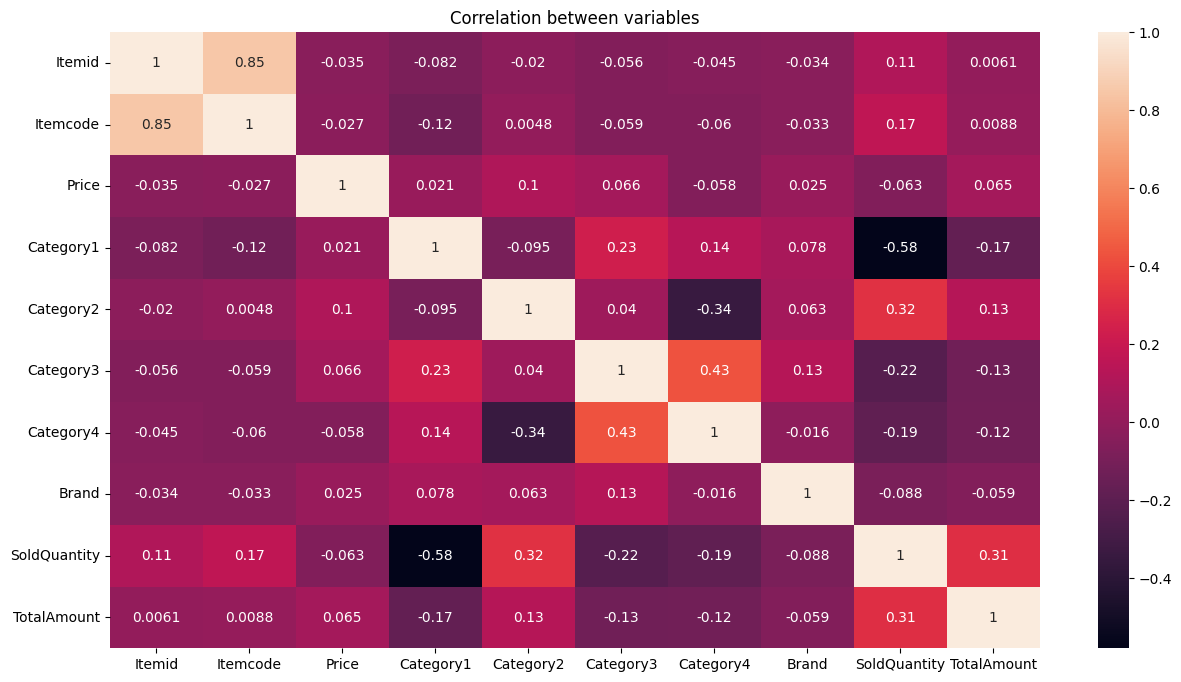

In [44]:
# biểu đồ heatmap thể hiện mối tương quan giữa các biến trong df_item_pd
plt.figure(figsize=(15,8))
sns.heatmap(df_item_pd1.corr(), annot=True)
plt.title('Correlation between variables')
plt.savefig('Image/Stastic/heatmap.png')
plt.show()


# Visualize

In [45]:
# Tính tổng TotalPAy theo Month trong trong cột Date ở df_order_pd
df_order_pd_temp=df_order_pd.copy()
df_order_pd_temp['Date'] = pd.to_datetime(df_order_pd_temp['Date'])
df_order_pd_temp['Month'] = df_order_pd_temp['Date'].dt.month
df_order_pd_temp['Year'] = df_order_pd_temp['Date'].dt.year


df_totalByMonth_pd=df_order_pd_temp.groupby(['Month', 'Year']).agg({'TotalPay': 'sum'}).reset_index()
# gộp 2 cột Month và Year thành 1 cột Date
df_totalByMonth_pd['MY']=df_totalByMonth_pd['Month'].astype(str)+'/'+df_totalByMonth_pd['Year'].astype(str)
# sort by Month and Year
df_totalByMonth_pd=df_totalByMonth_pd.sort_values(by=['Year','Month'])


df_totalByDay_pd=df_order_pd_temp.groupby(['Date']).agg({'TotalPay': 'sum'}).reset_index()
df_totalByDay_pd['Month'] = df_totalByDay_pd['Date'].dt.month
df_totalByDay_pd['Year'] = df_totalByDay_pd['Date'].dt.year
df_totalByDay_pd['Date'] = df_totalByDay_pd['Date'].dt.day
# sort by Month and Year

df_totalByDay_pd=df_totalByDay_pd.sort_values(by=['Year','Month','Date'])

# change column name "TotalPay" to "Total"
df_totalByMonth_pd.rename(columns={'TotalPay': 'Total'}, inplace=True)
df_totalByDay_pd.rename(columns={'TotalPay': 'Total'}, inplace=True)

# ở bảng df_totalByDay_pd đưa cột Total ra sau cùng
cols = list(df_totalByDay_pd.columns.values)
cols.pop(cols.index('Total'))
df_totalByDay_pd = df_totalByDay_pd[cols+['Total']]


cols = list(df_totalByMonth_pd.columns.values)
cols.pop(cols.index('Total'))
df_totalByMonth_pd = df_totalByMonth_pd[cols+['Total']]

df_totalByDay_pd.to_csv('Data/df_totalByDay_pd.csv',index=False)
df_totalByMonth_pd.to_csv('Data/df_totalByMonth_pd.csv',index=False)

df_totalByDay_pd



Date  Month  Year      Total
0       1      1  2021   44228.68
1       2      1  2021   46906.08
2       3      1  2021   44710.80
3       4      1  2021   50905.47
4       5      1  2021   51692.29
..    ...    ...   ...        ...
951    10      8  2023   95250.61
952    11      8  2023   90371.86
953    12      8  2023  102425.05
954    13      8  2023   99400.36
955    14      8  2023   94164.35

[956 rows x 4 columns]

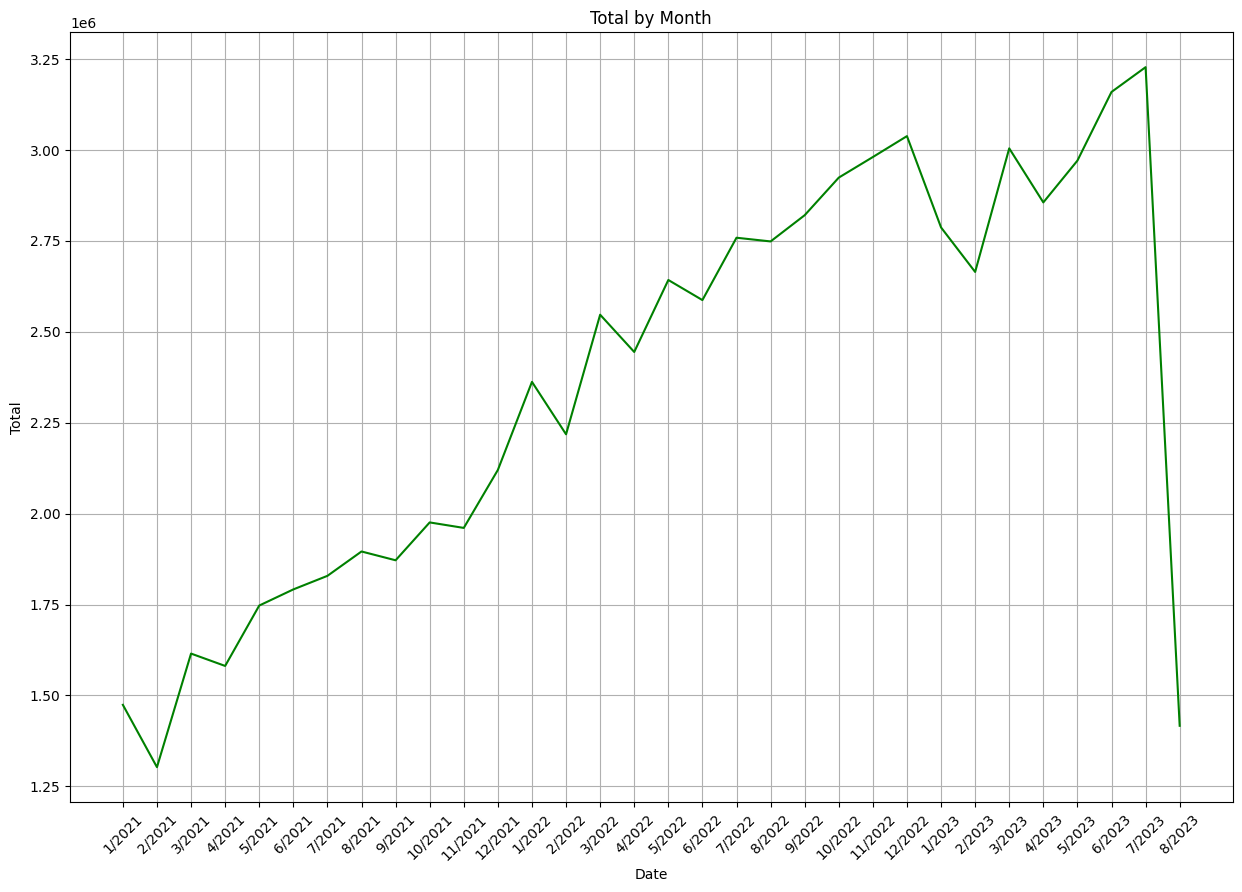

In [46]:
# use lineplot() to plot the line chart if it up use color='green' if it down use color='red'
plt.figure(figsize=(15, 10))
sns.lineplot(x='MY', y='Total', data=df_totalByMonth_pd, color='green')
plt.title('Total by Month')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Total')
plt.grid()
plt.subplots_adjust(hspace=0.3)
plt.savefig('Image/0/Total_by_Day_in_Month_0_in_0.png')
plt.show()

C:\Users\ThinhDo\AppData\Local\Temp\ipykernel_1544\2193245512.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15, 10))


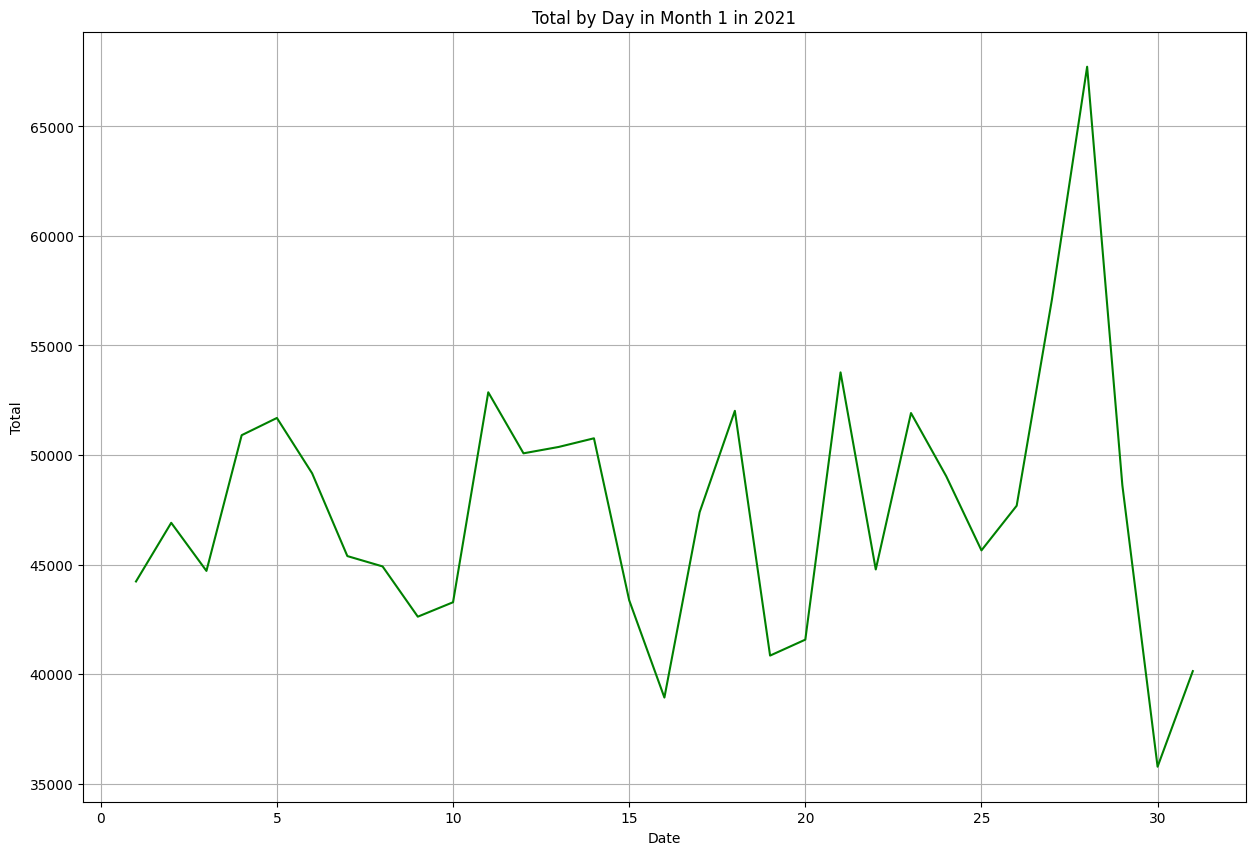

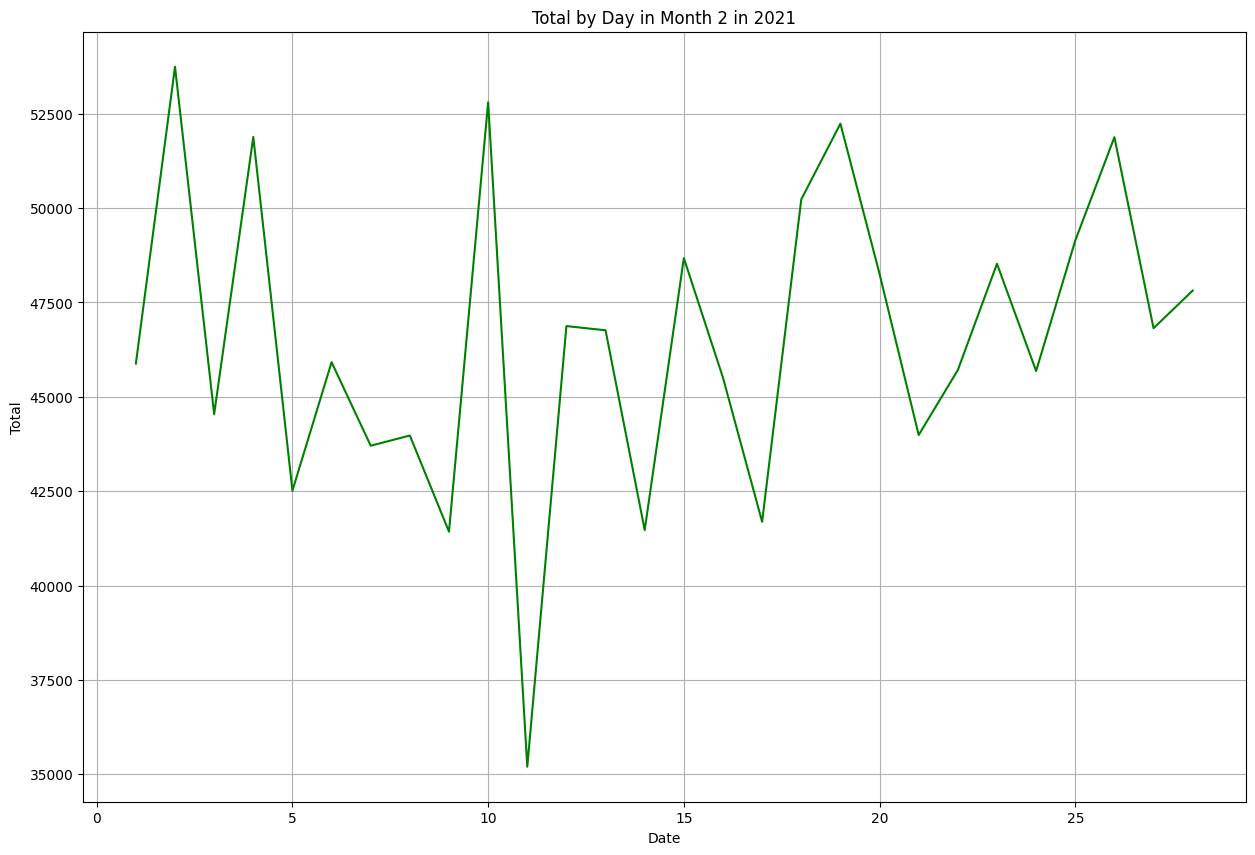

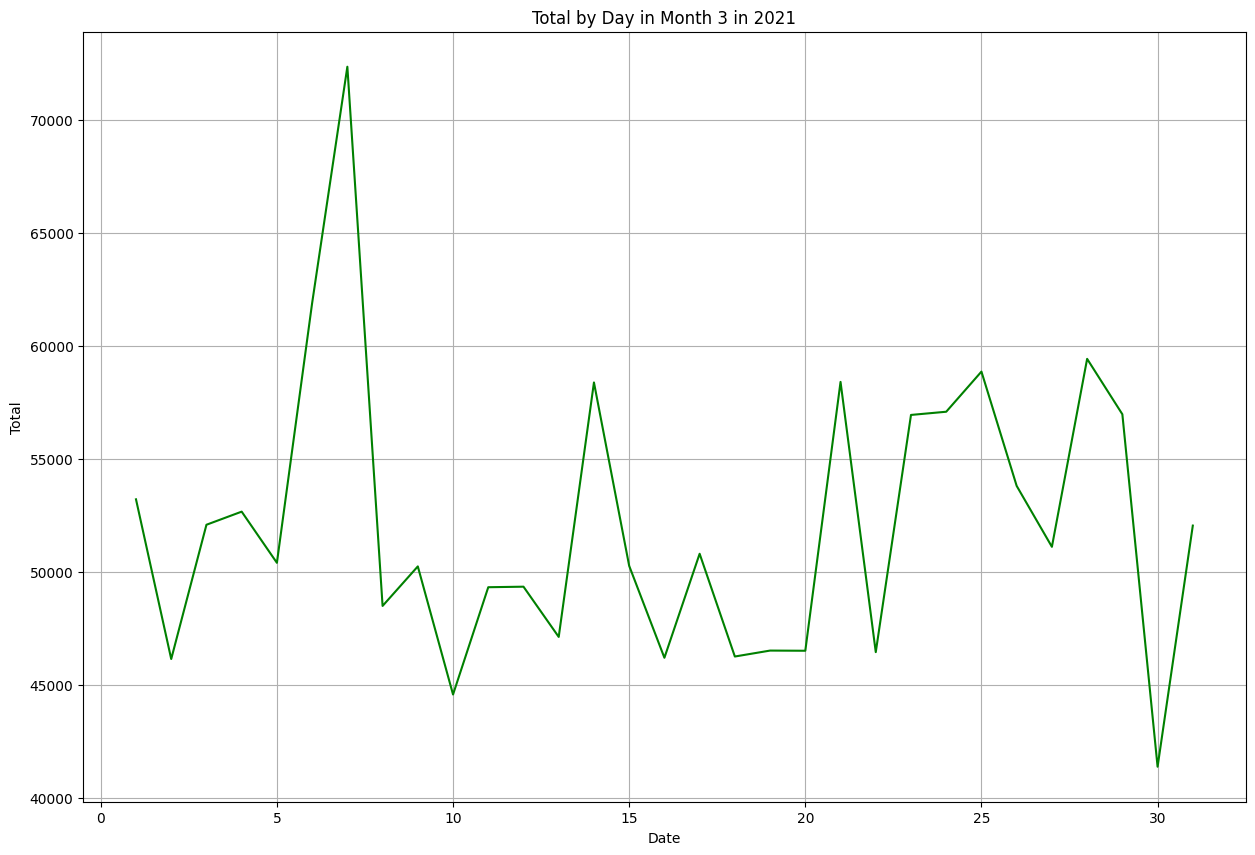

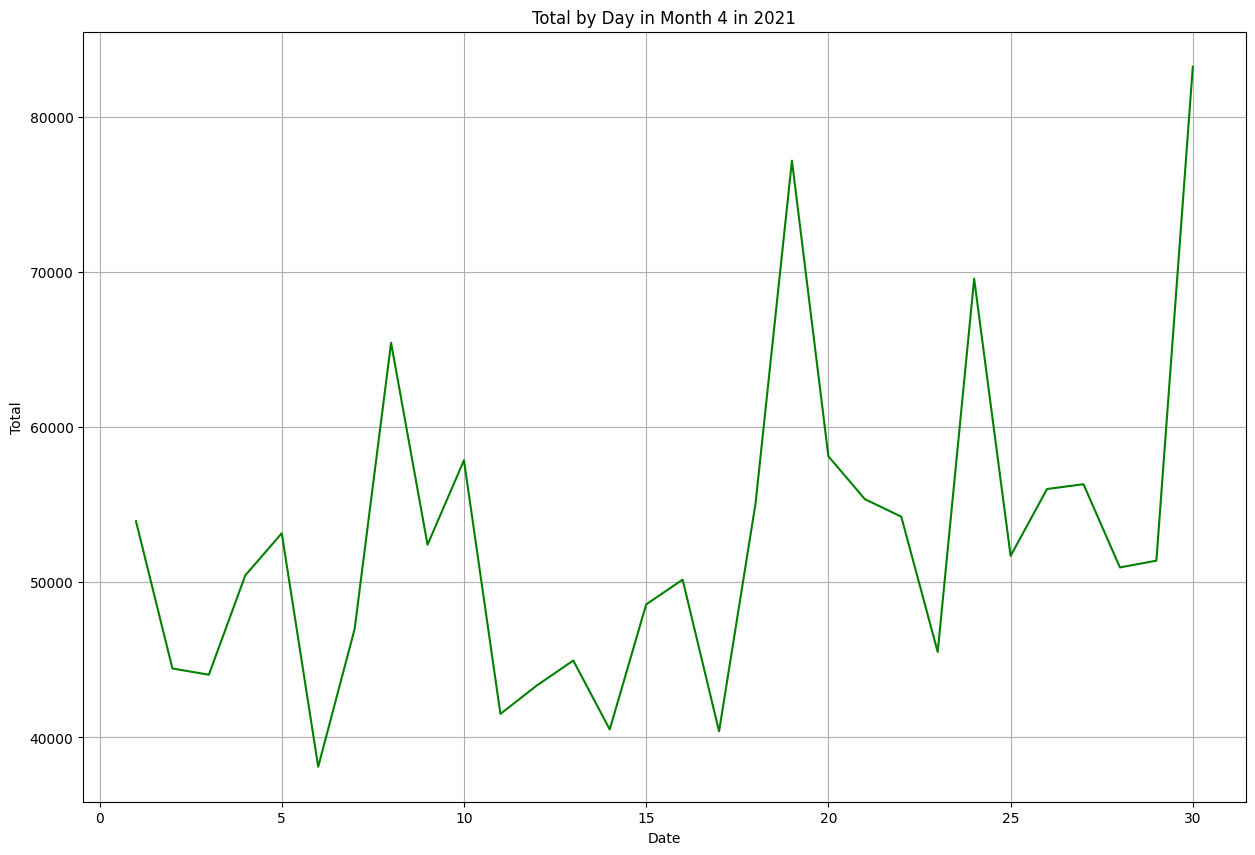

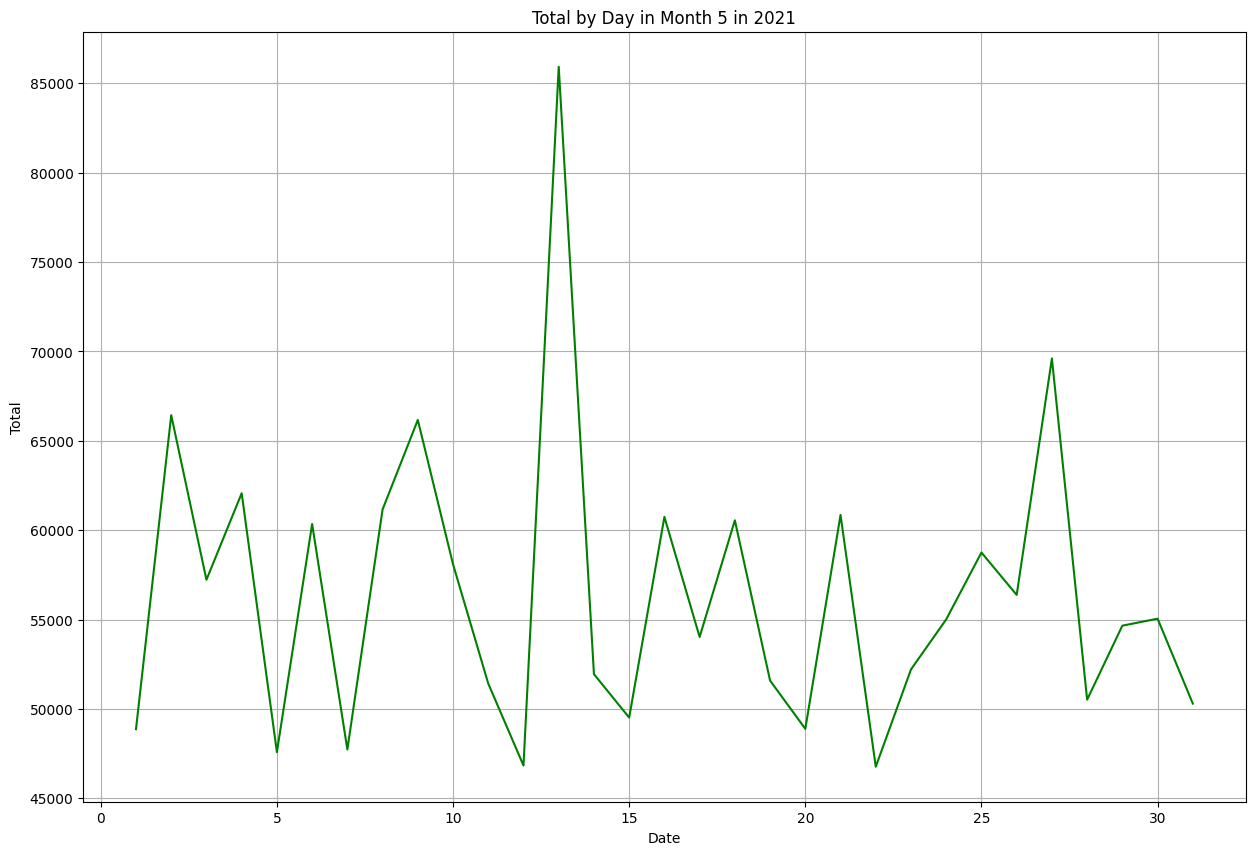

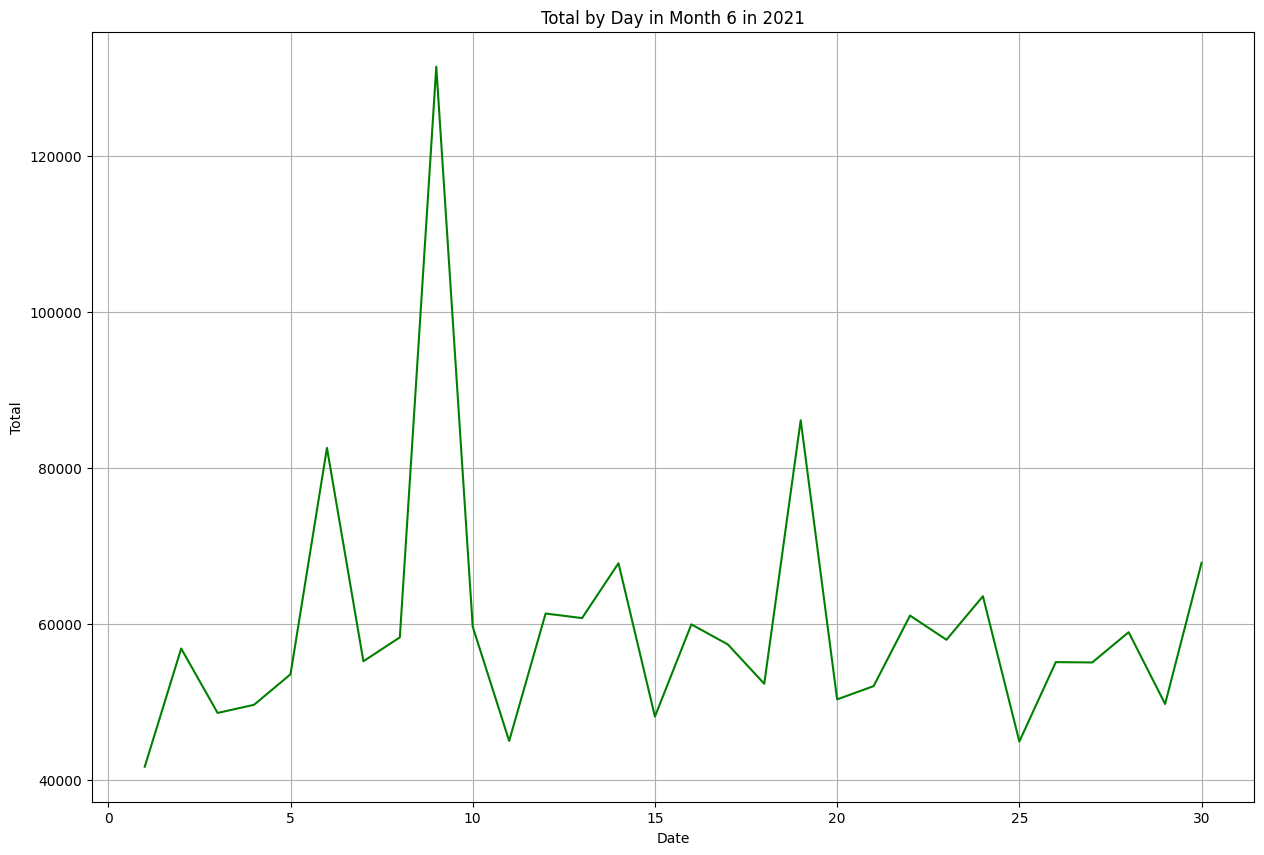

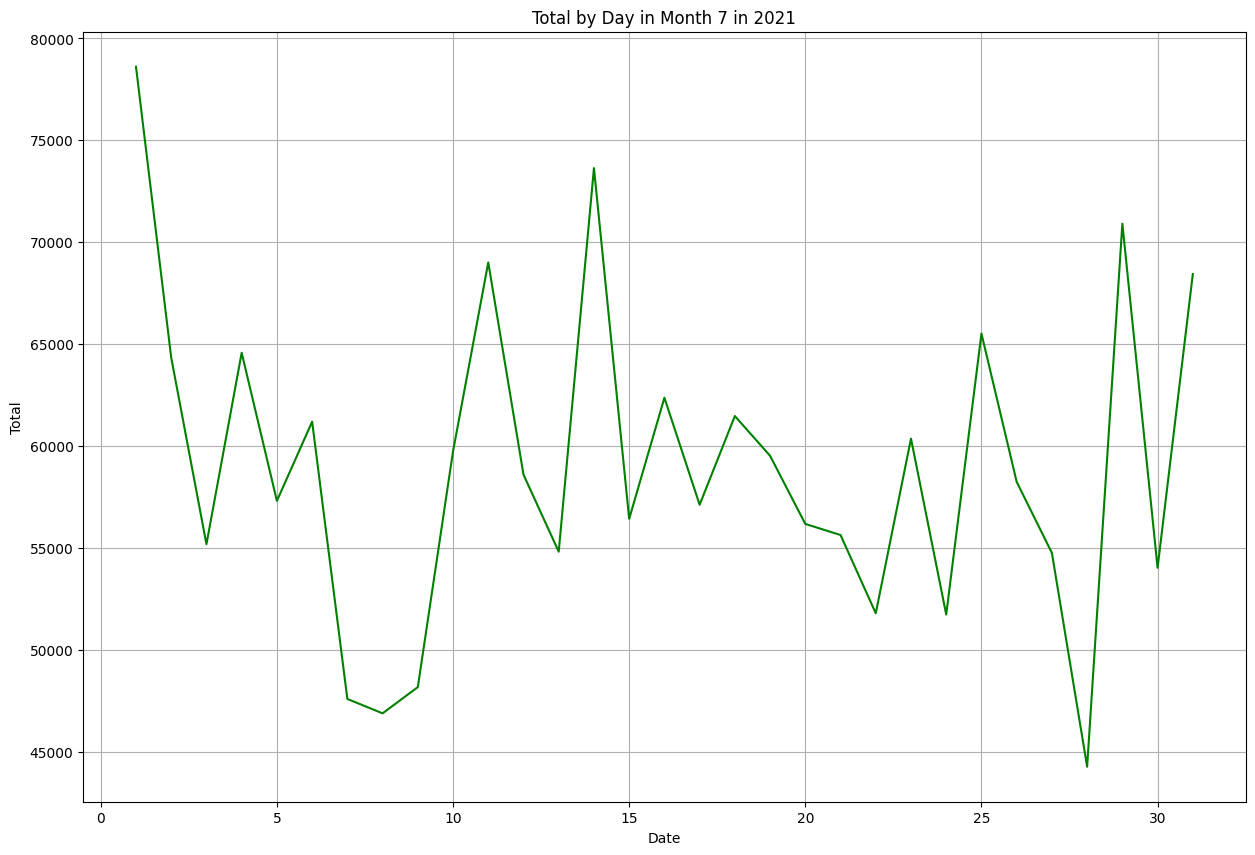

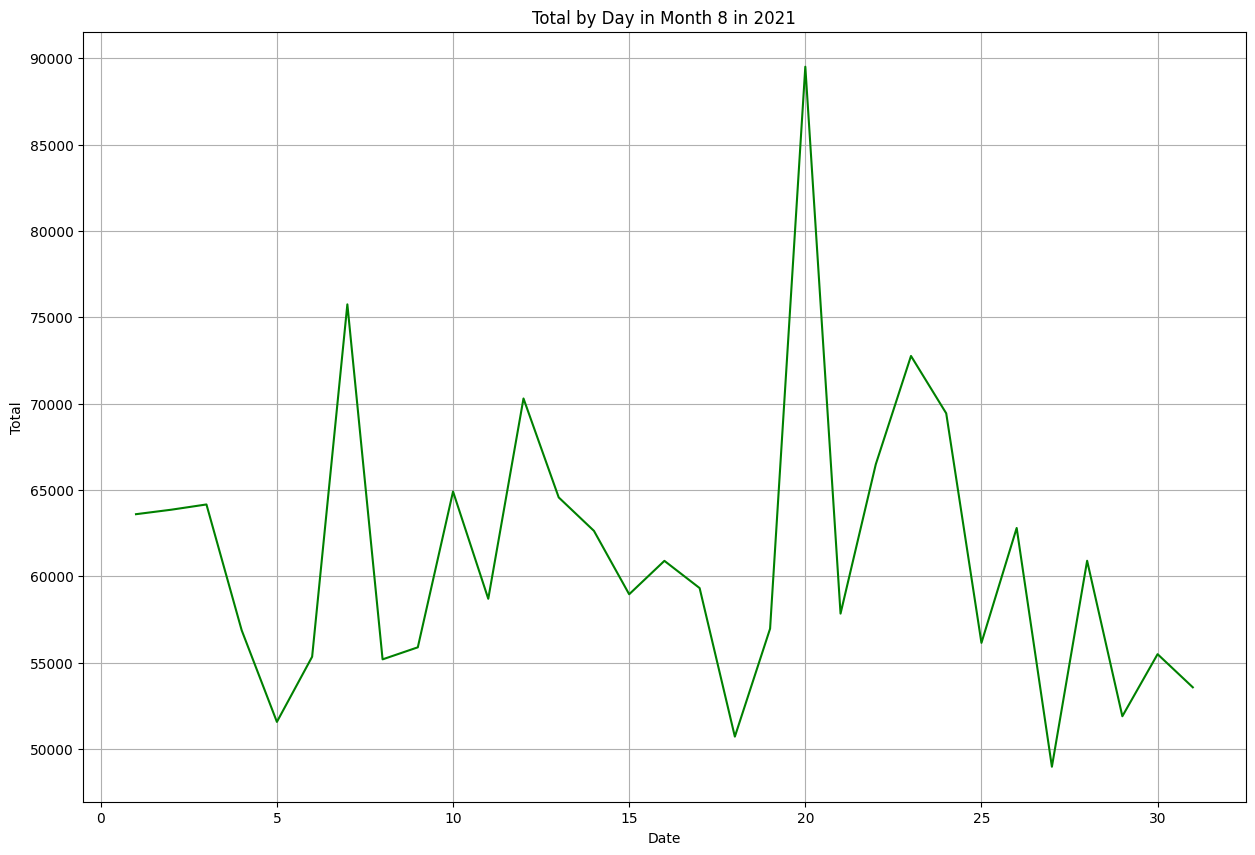

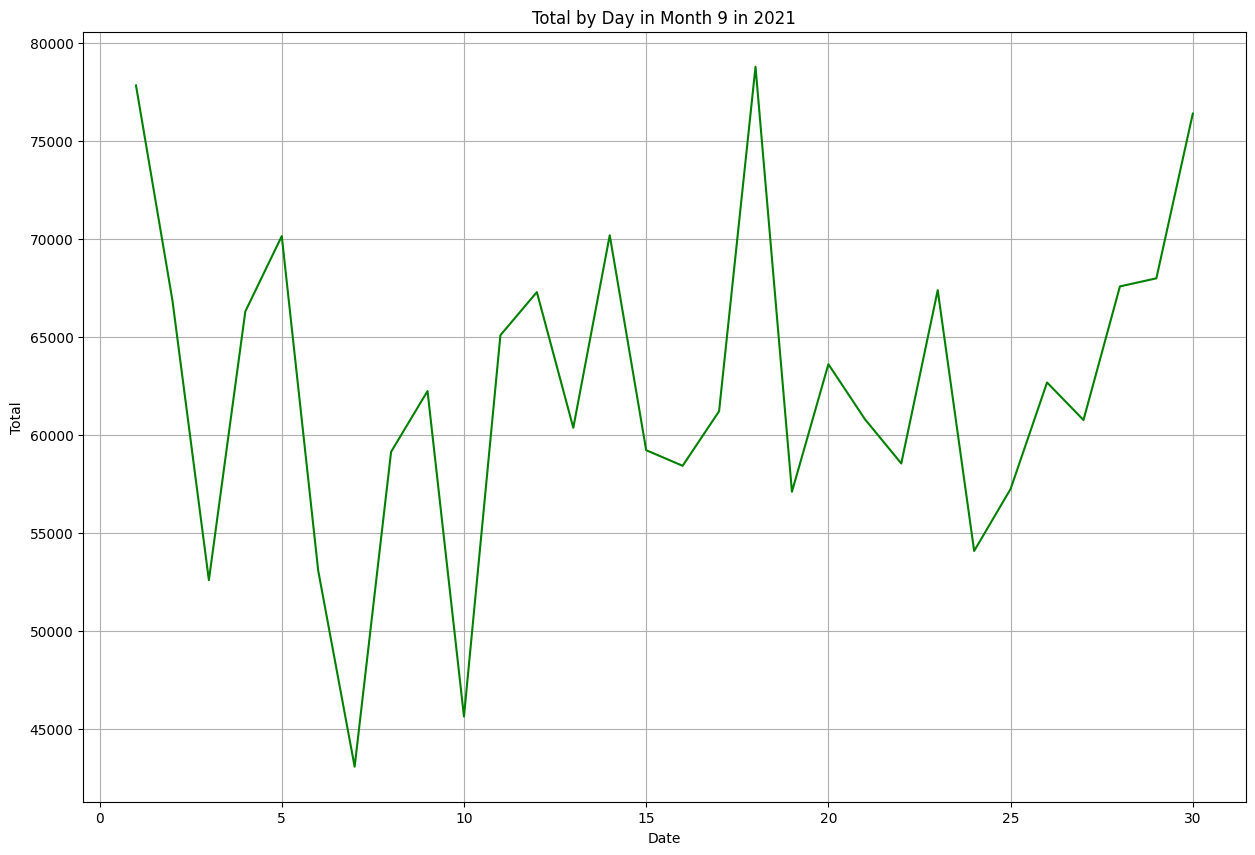

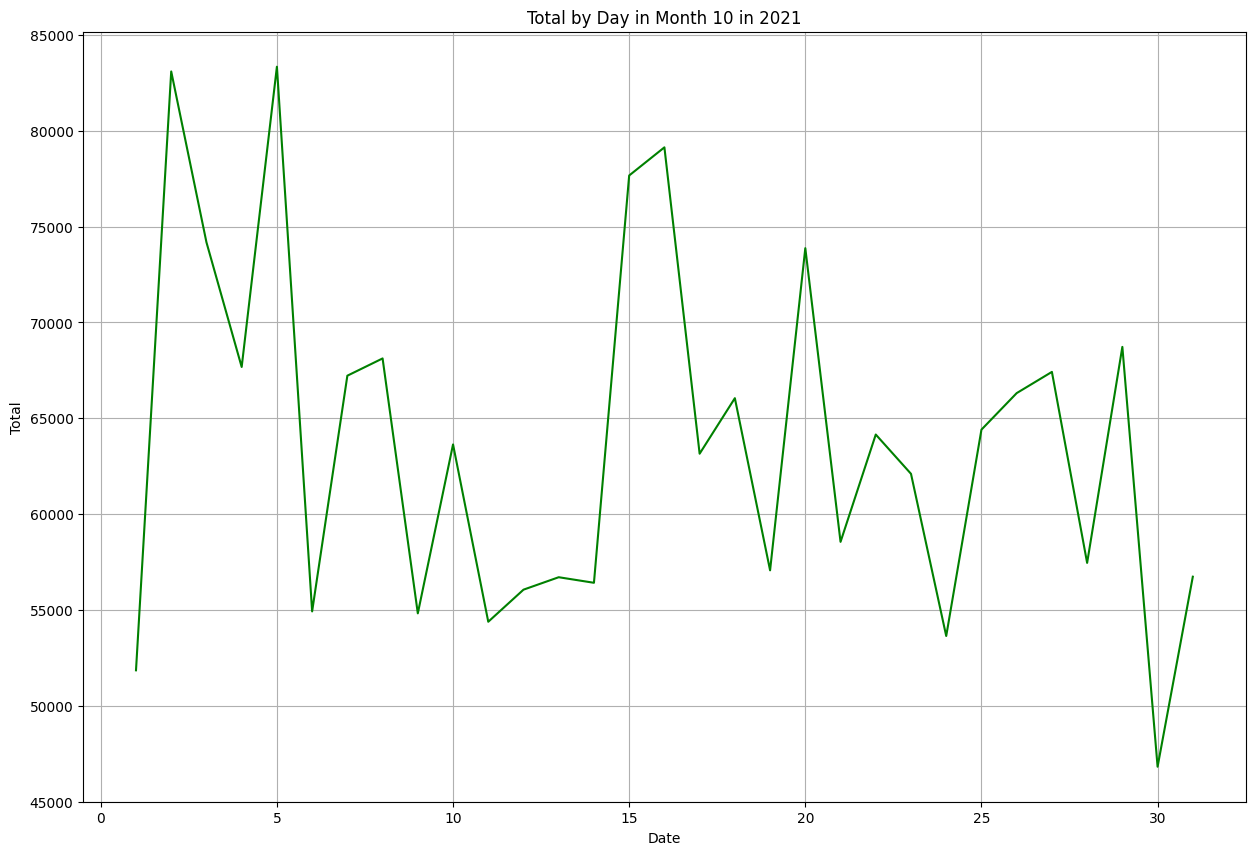

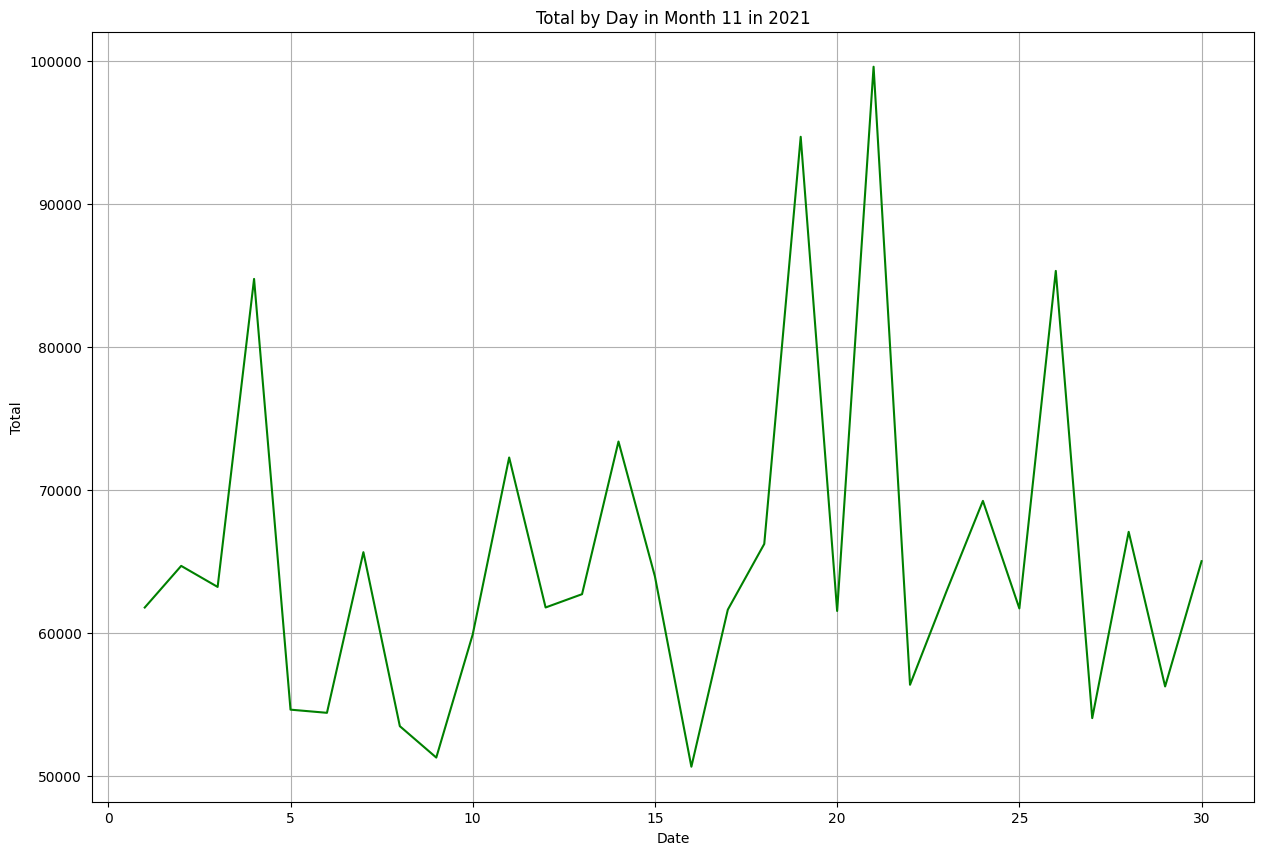

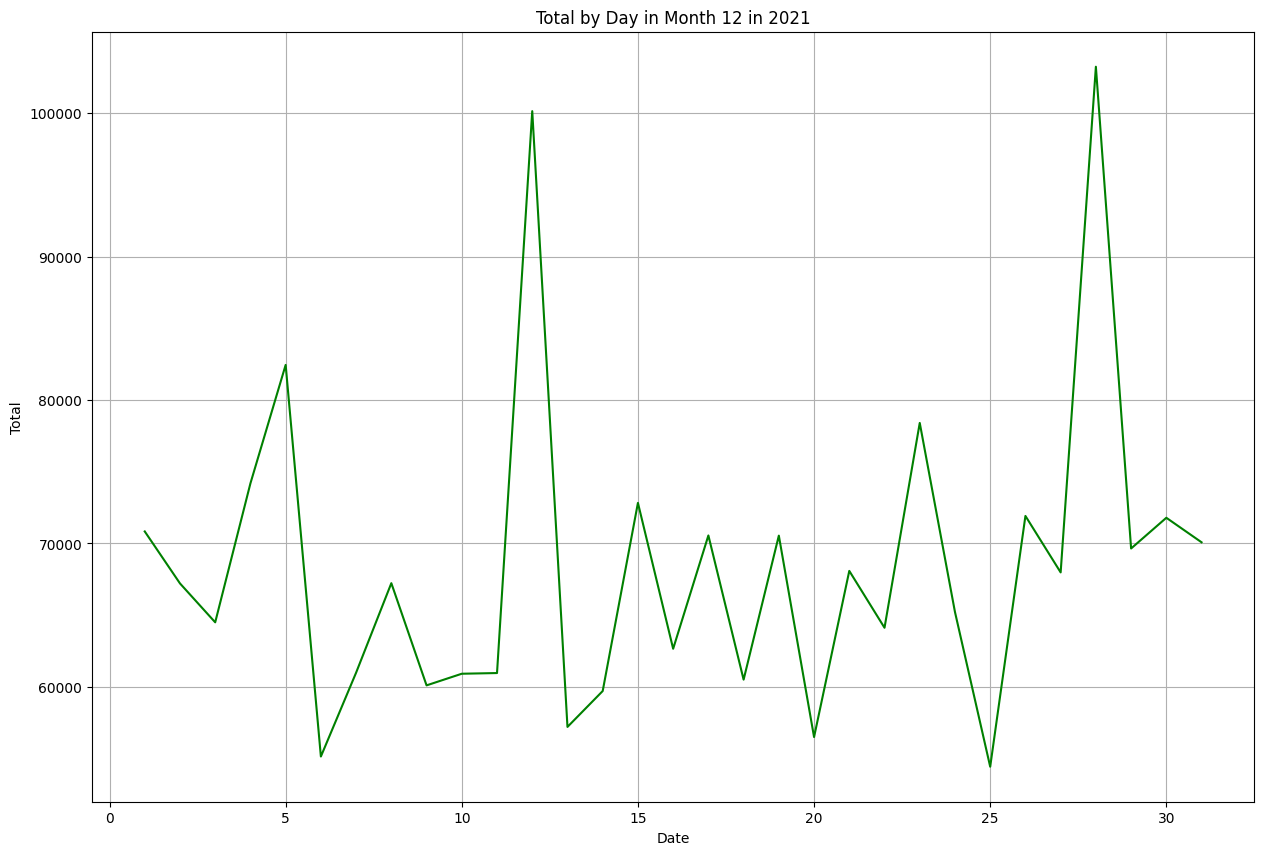

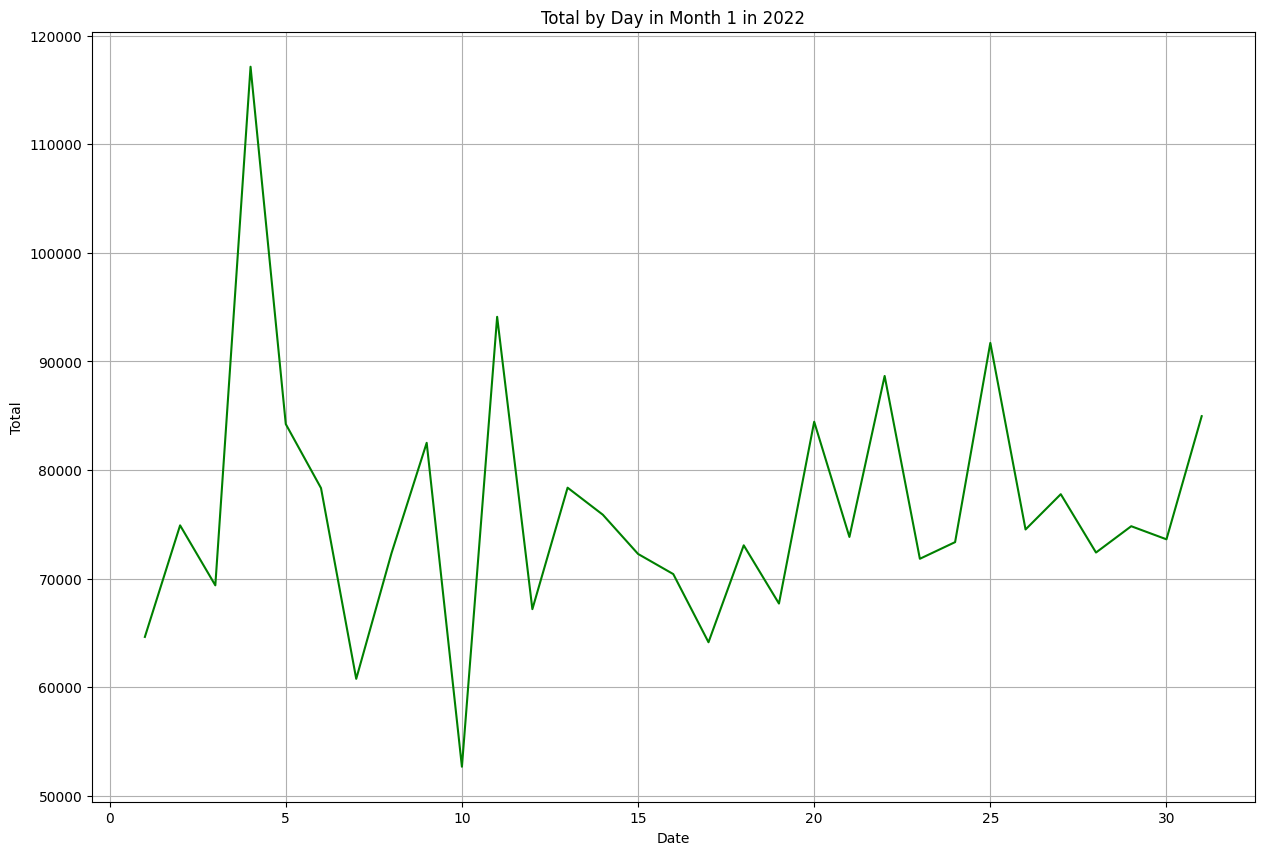

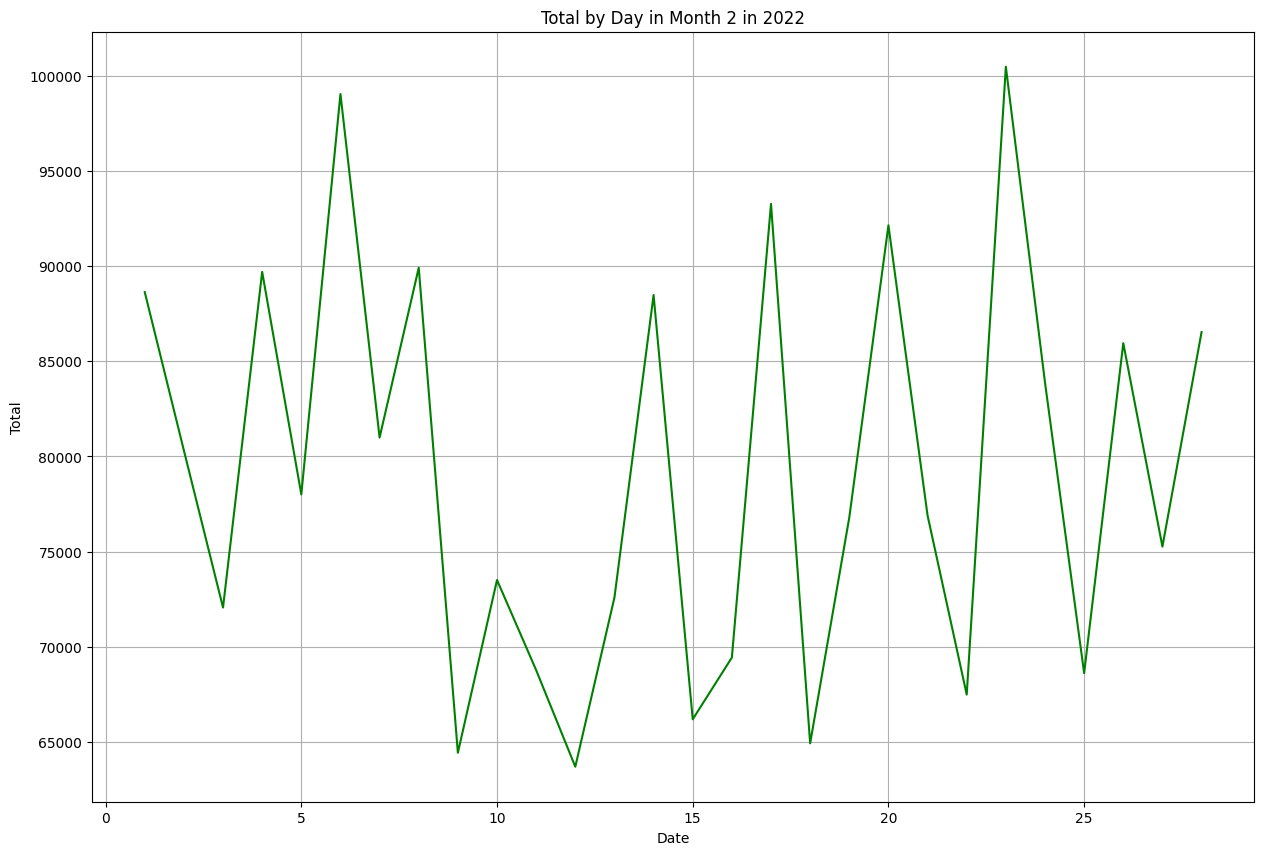

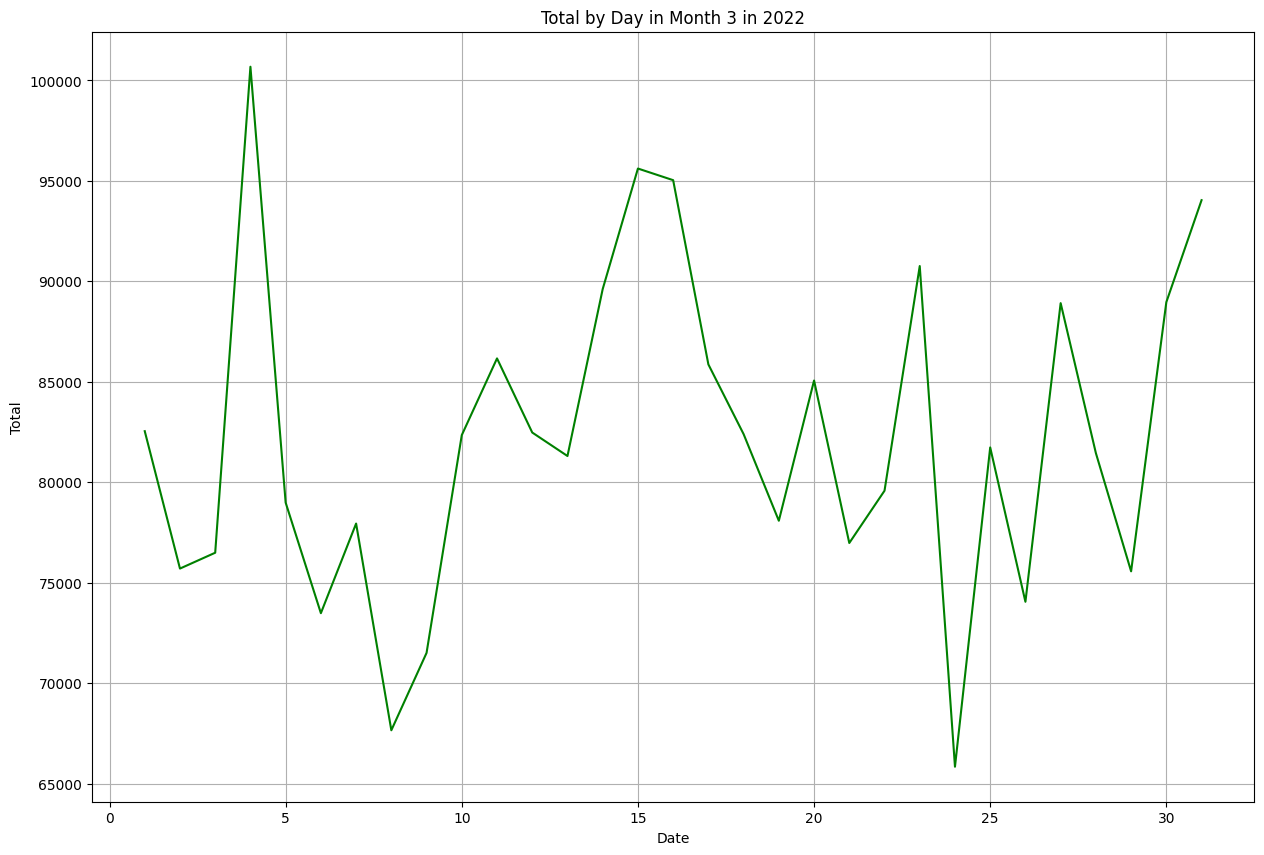

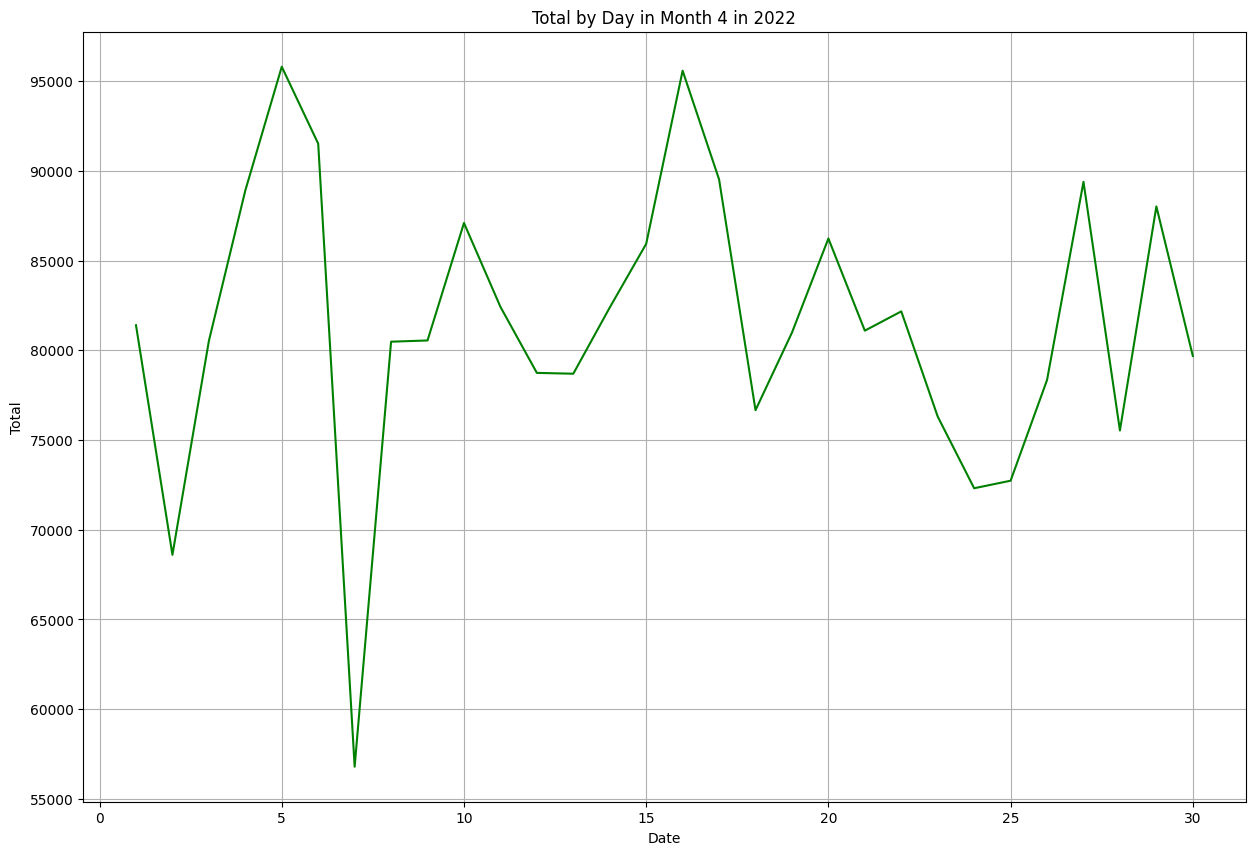

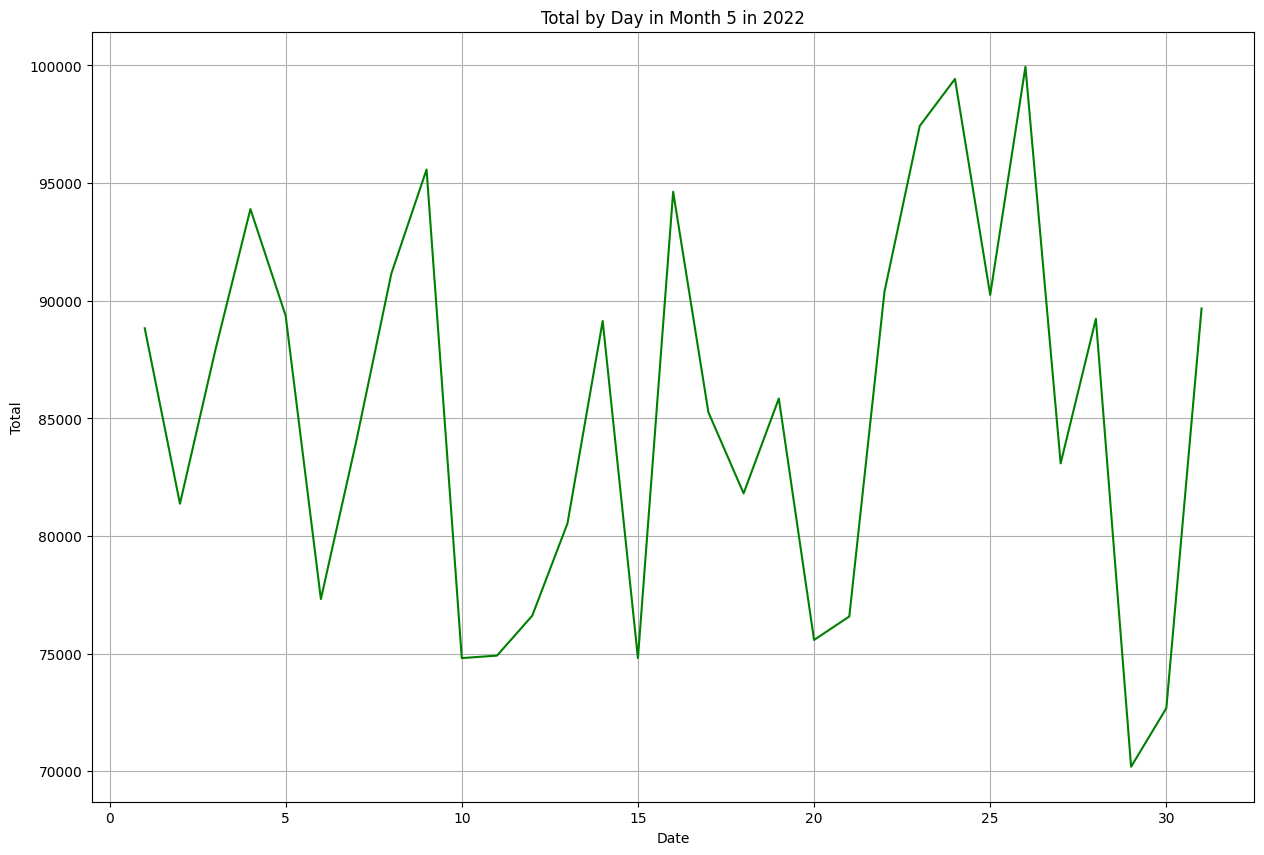

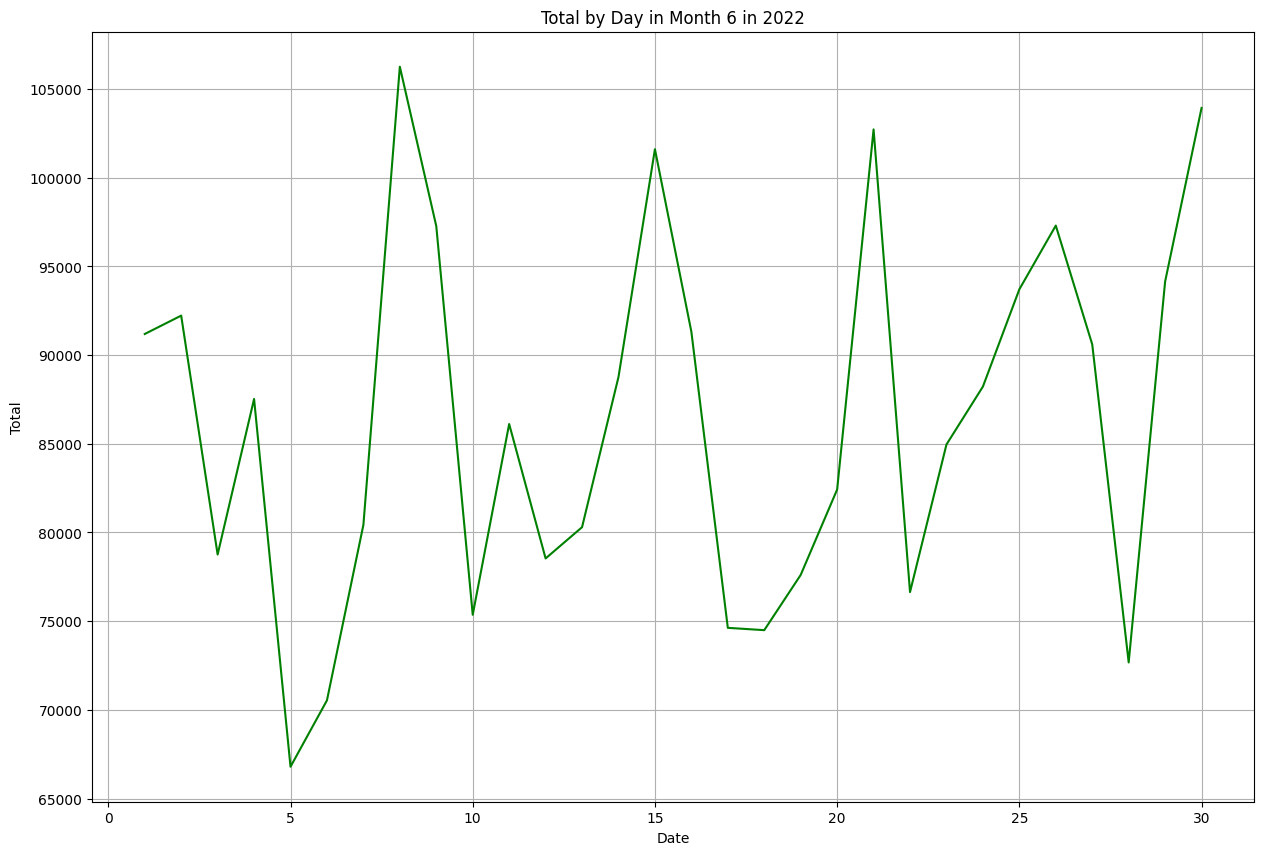

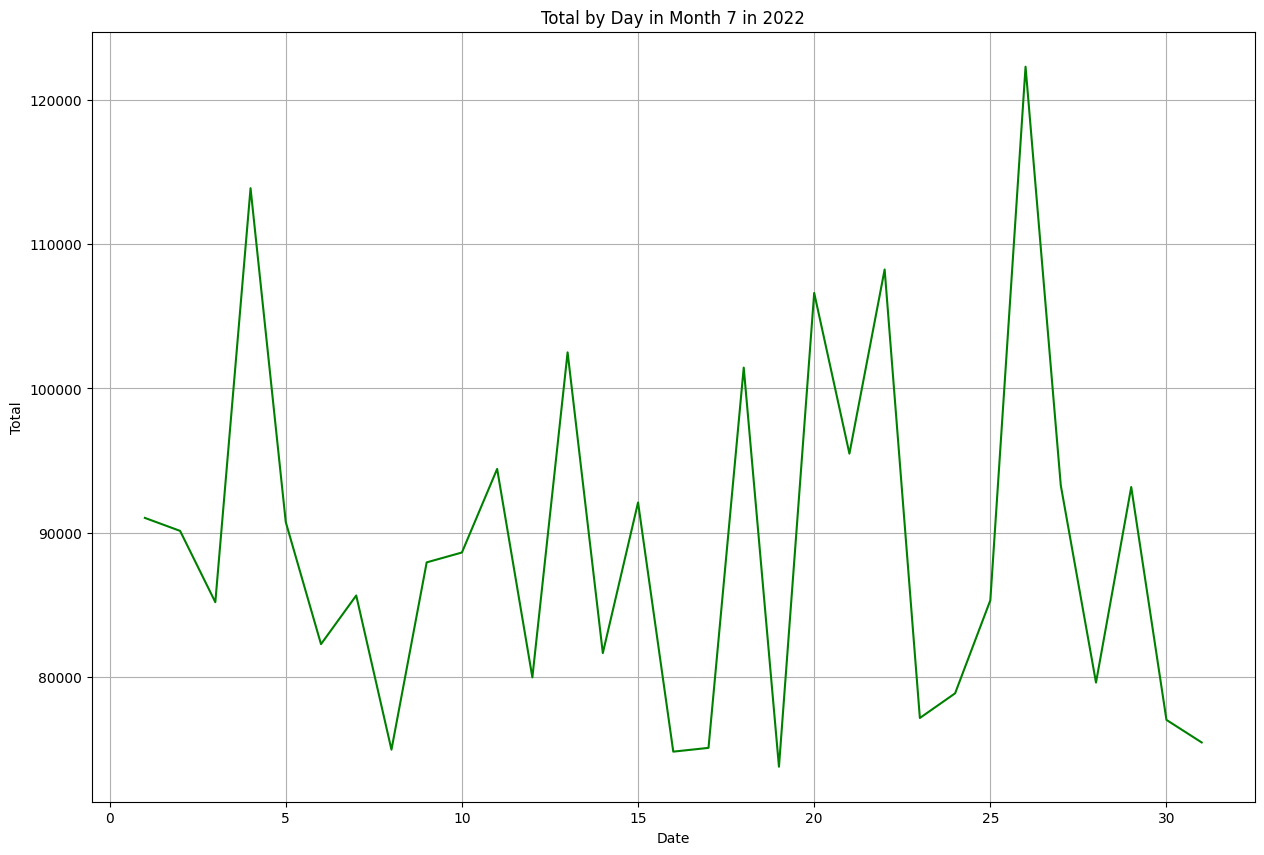

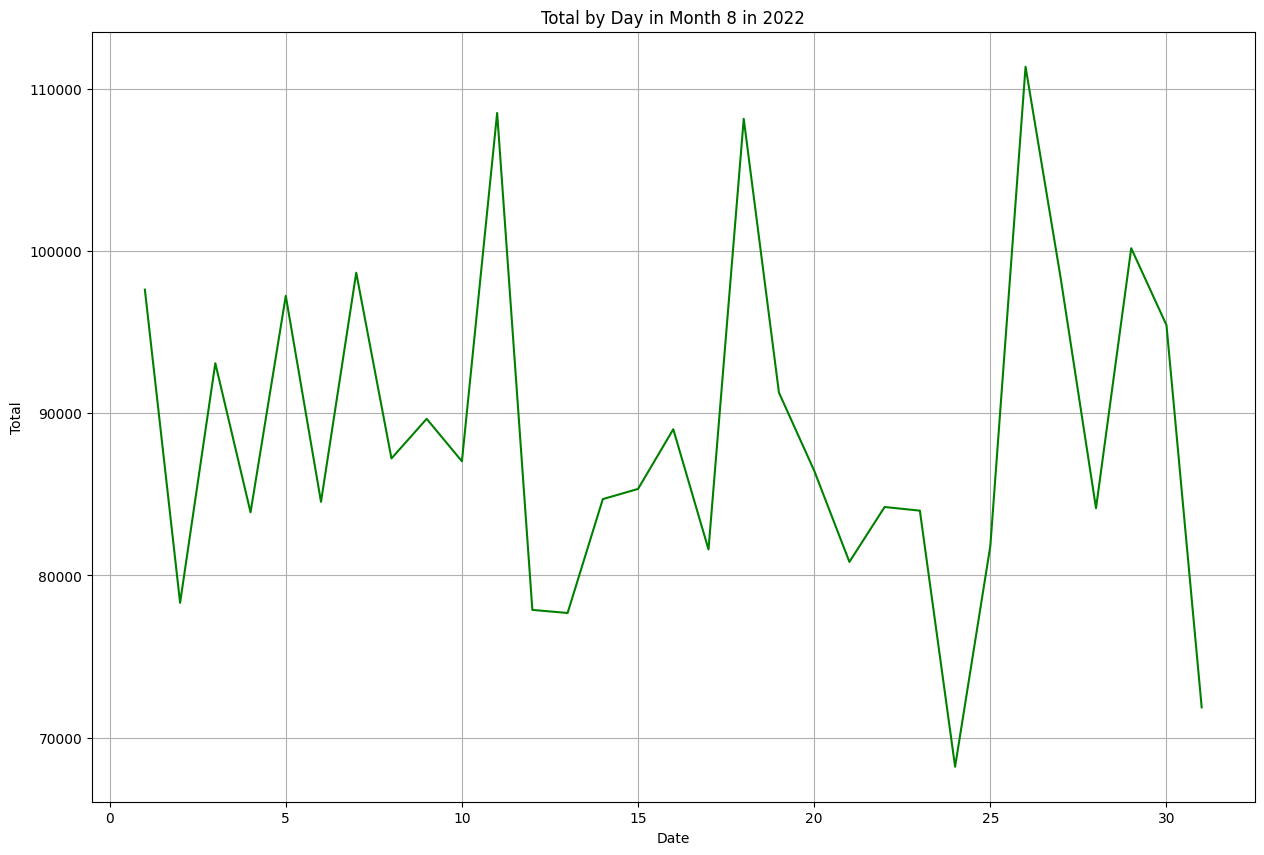

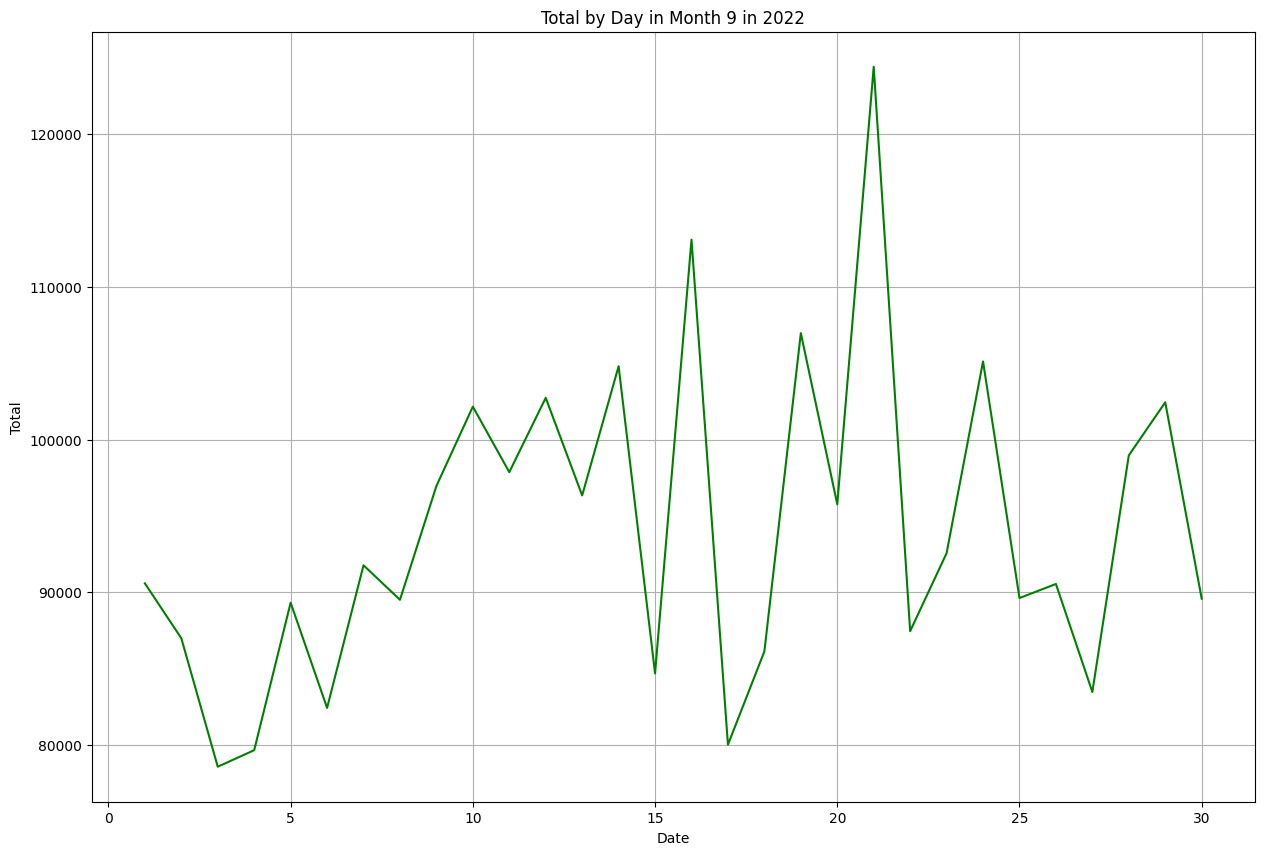

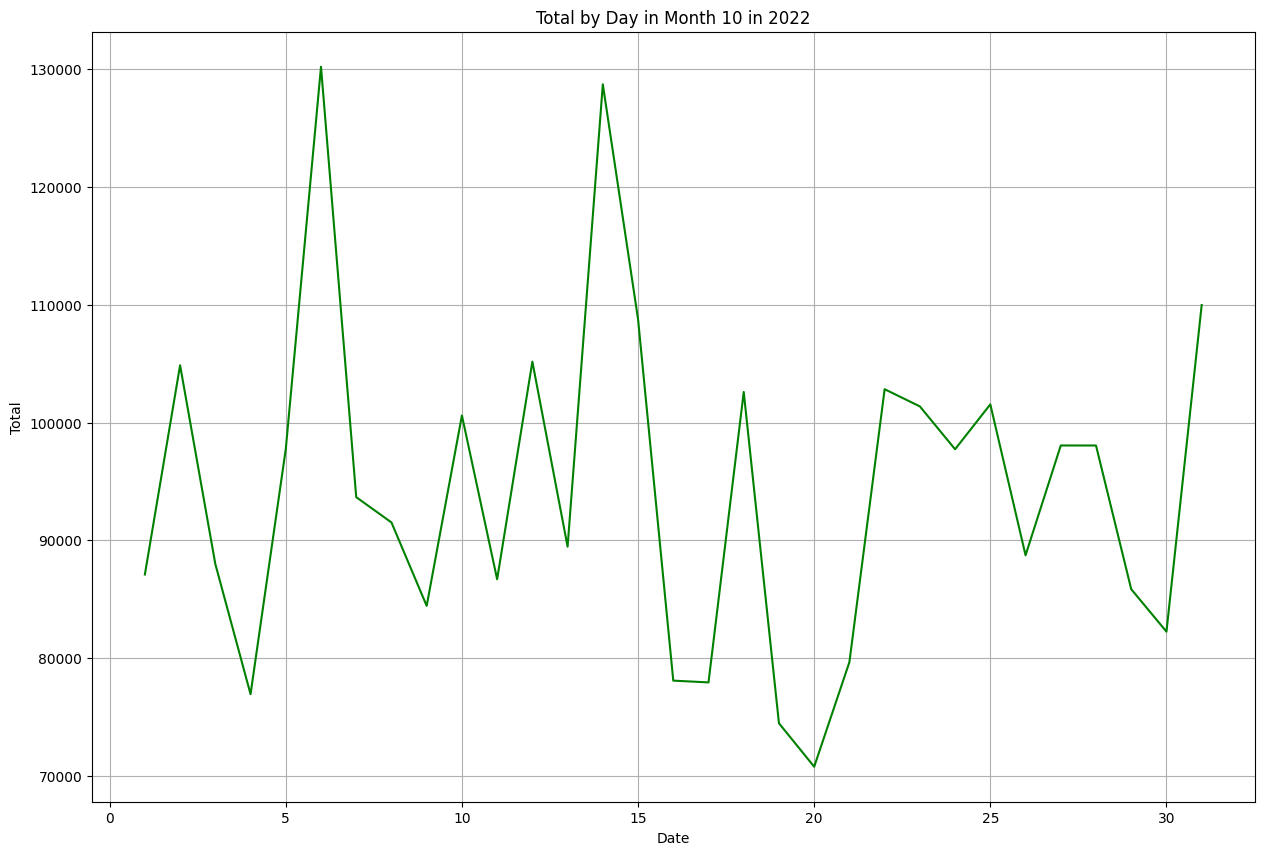

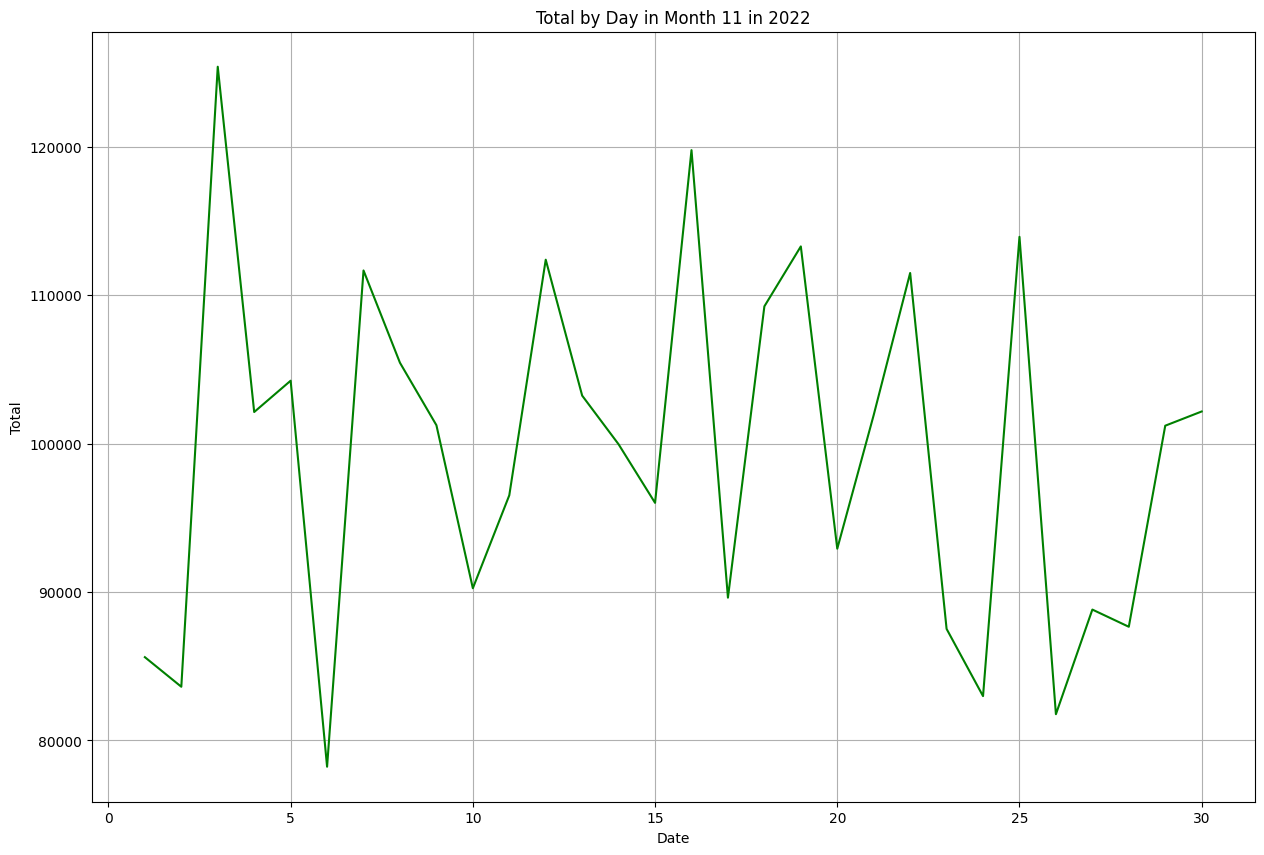

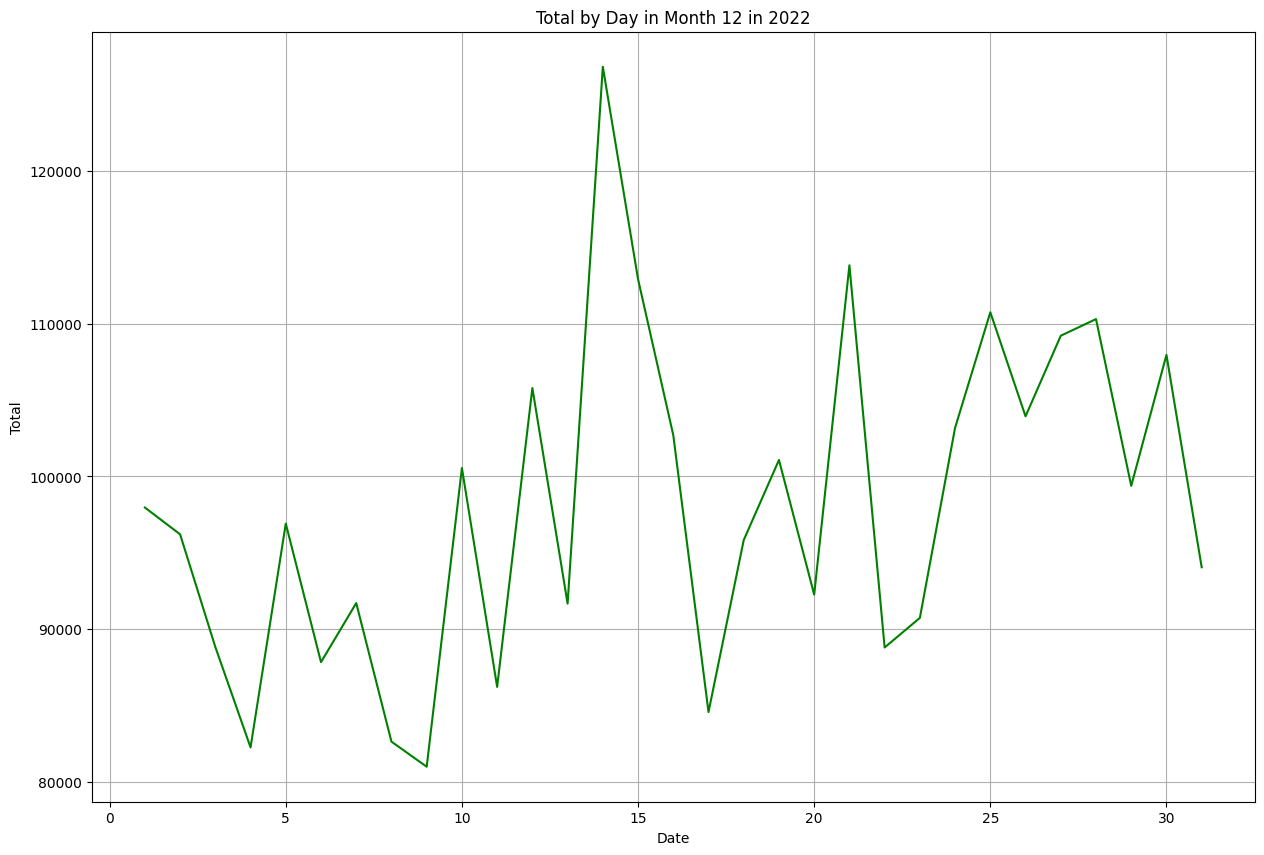

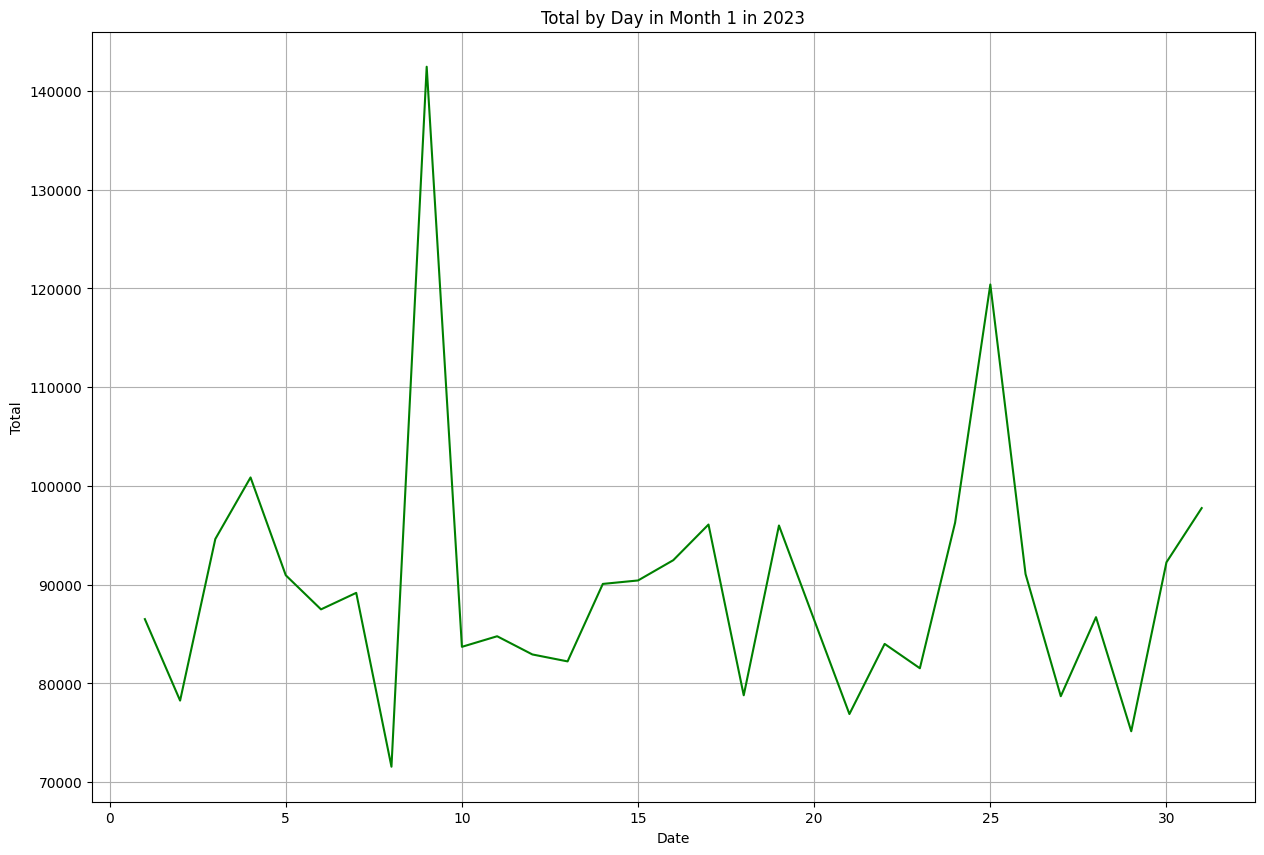

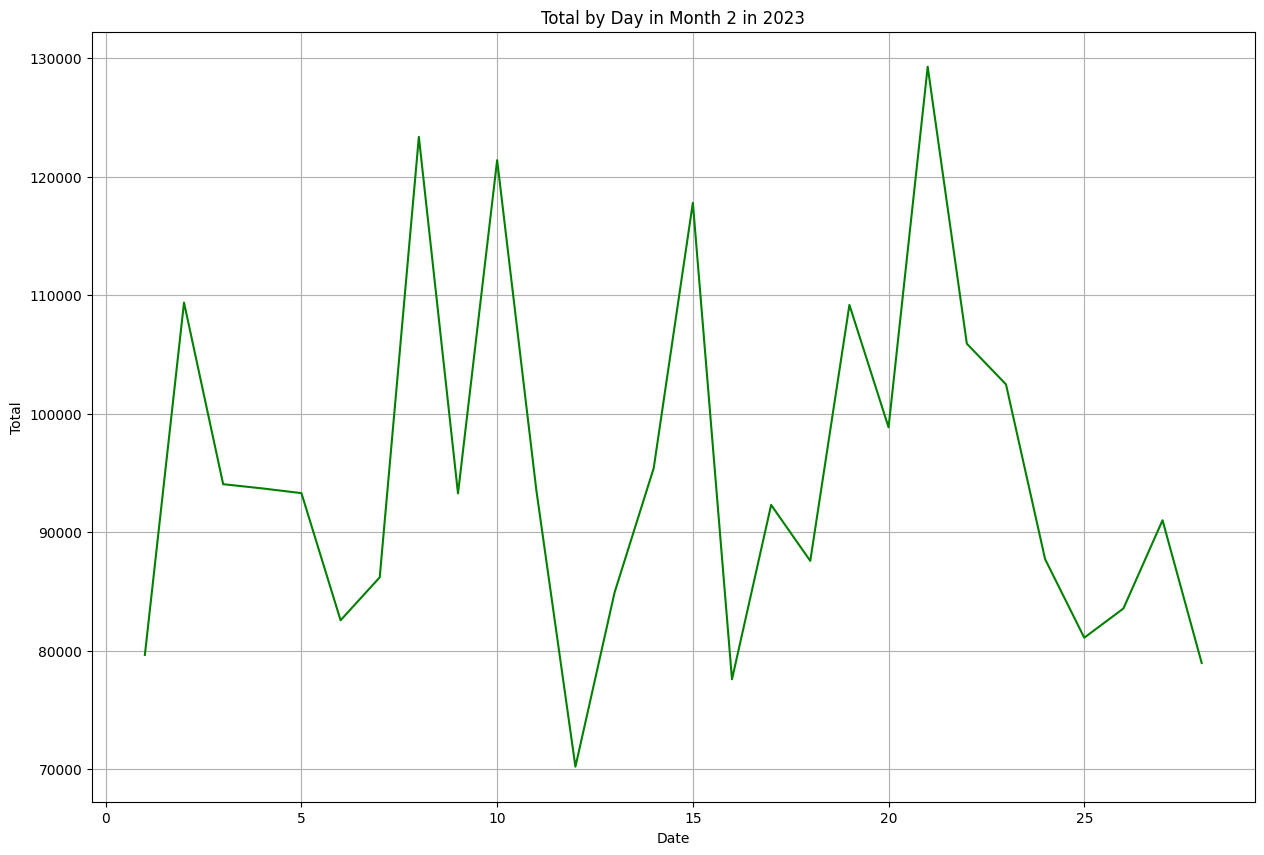

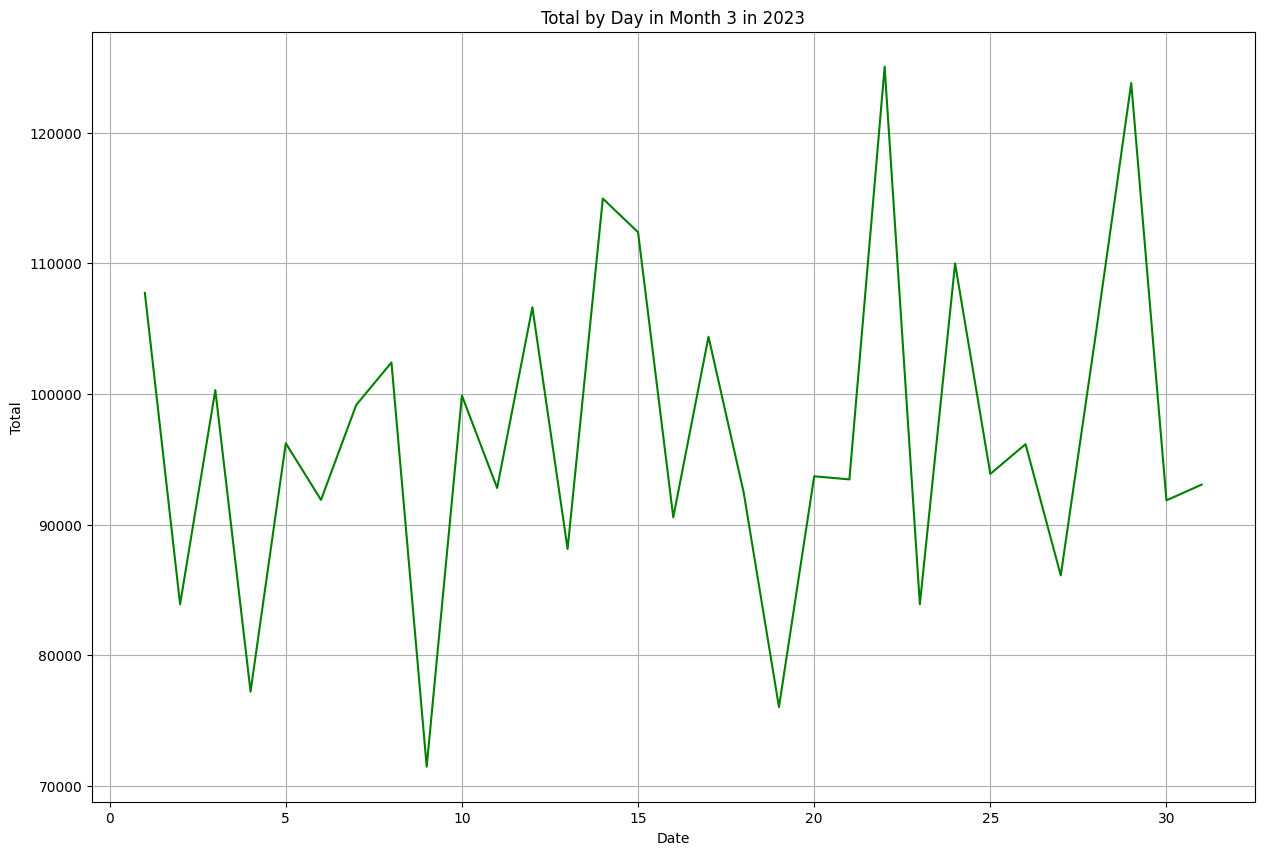

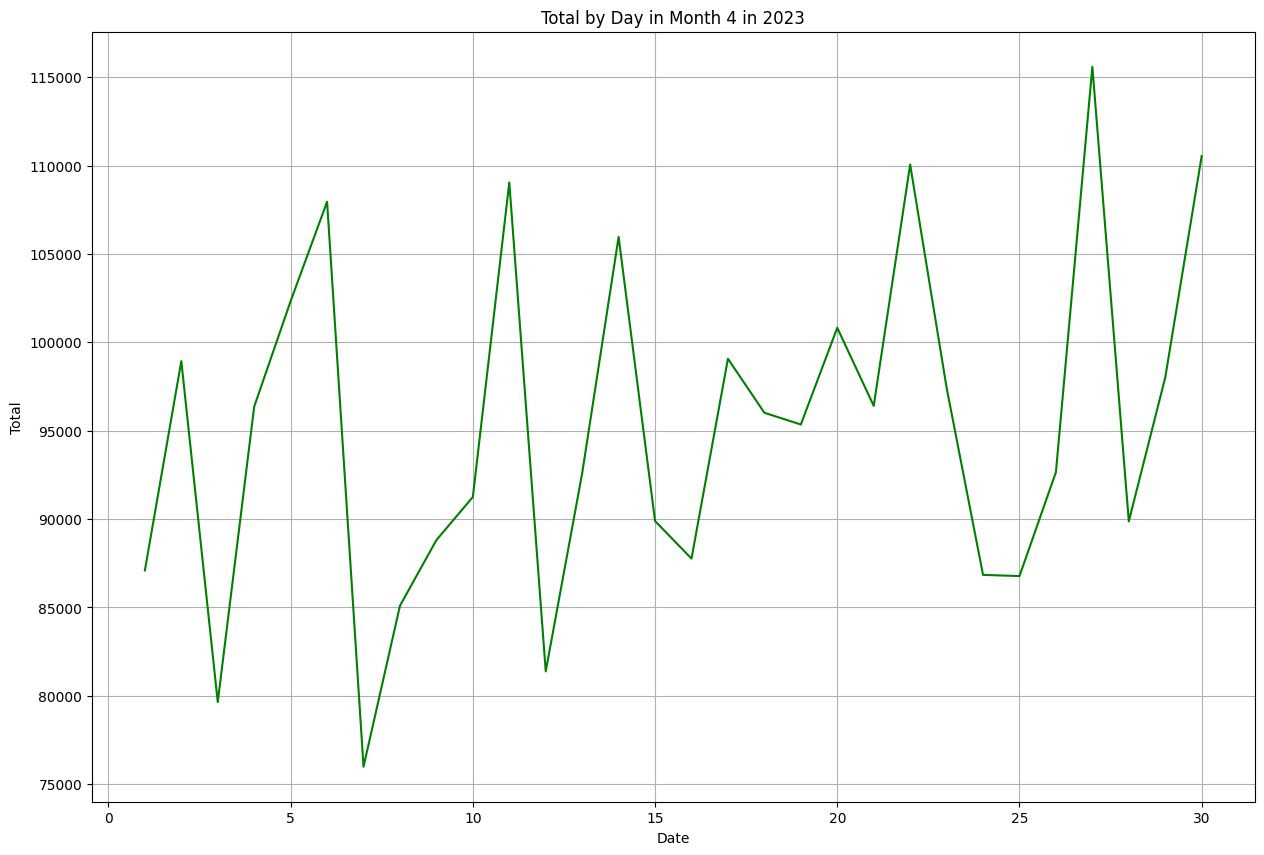

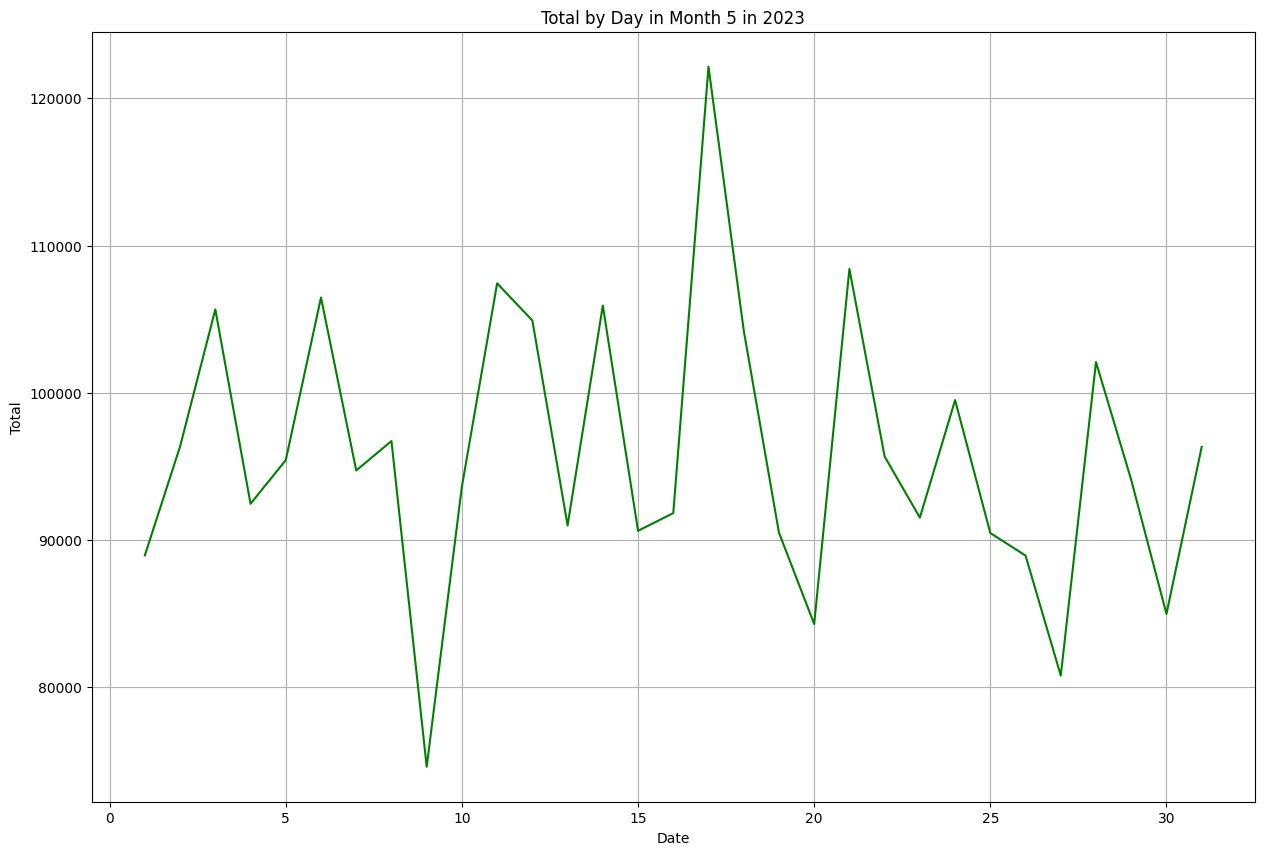

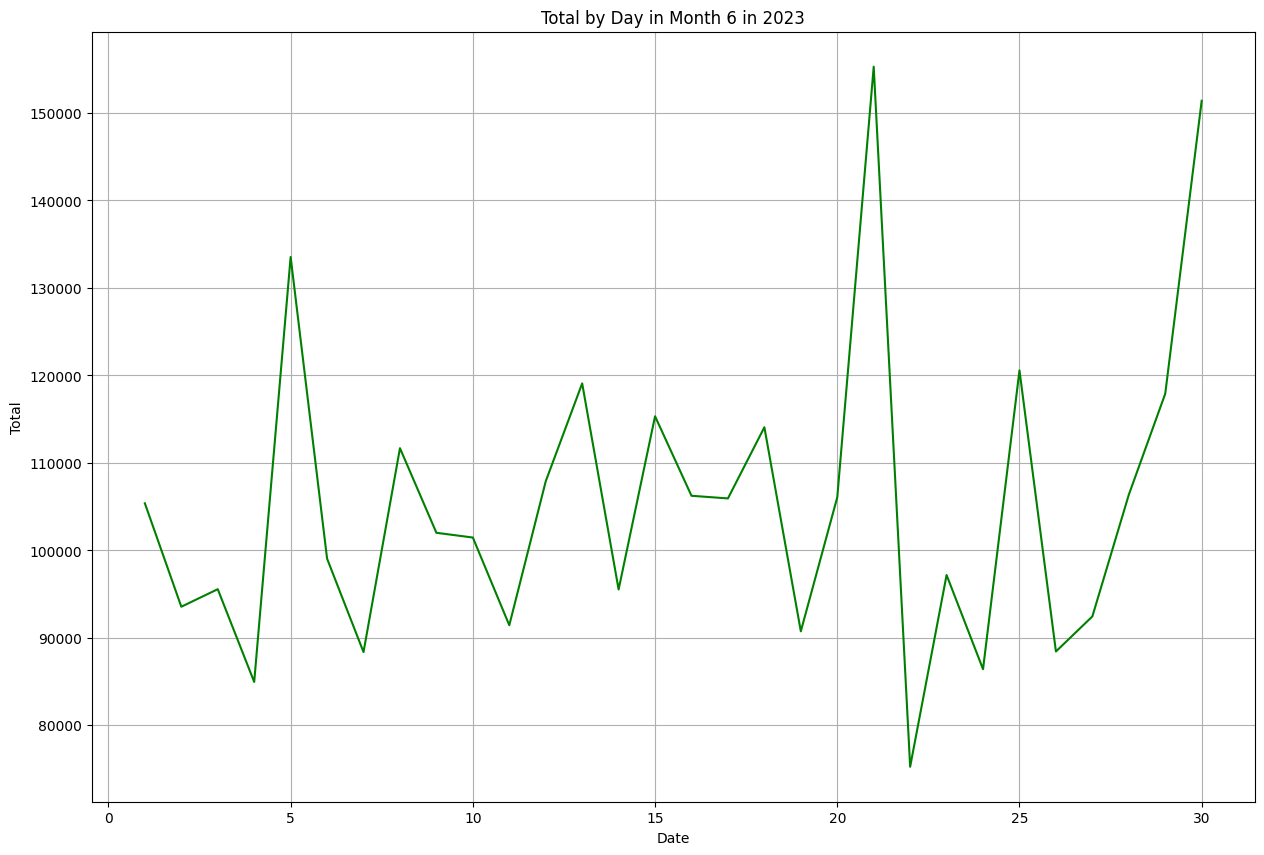

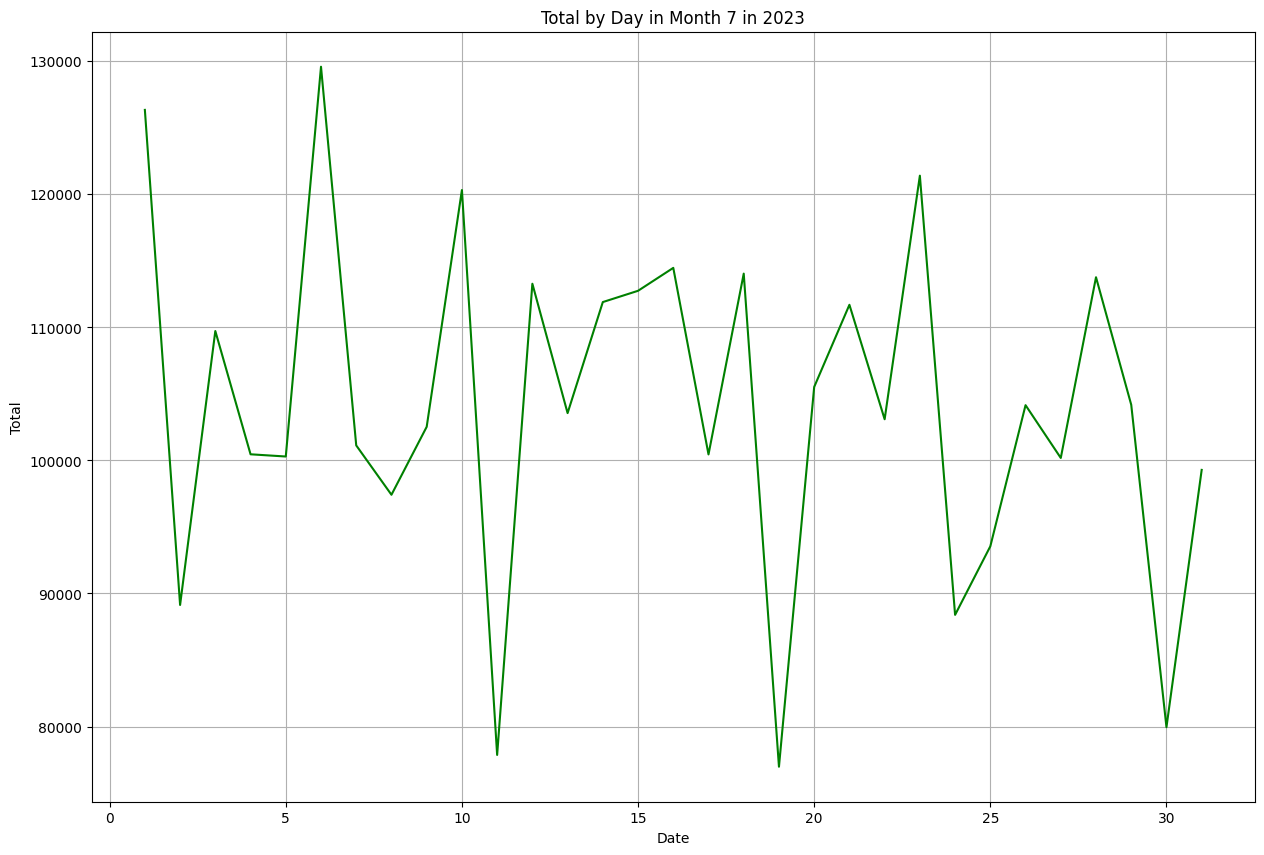

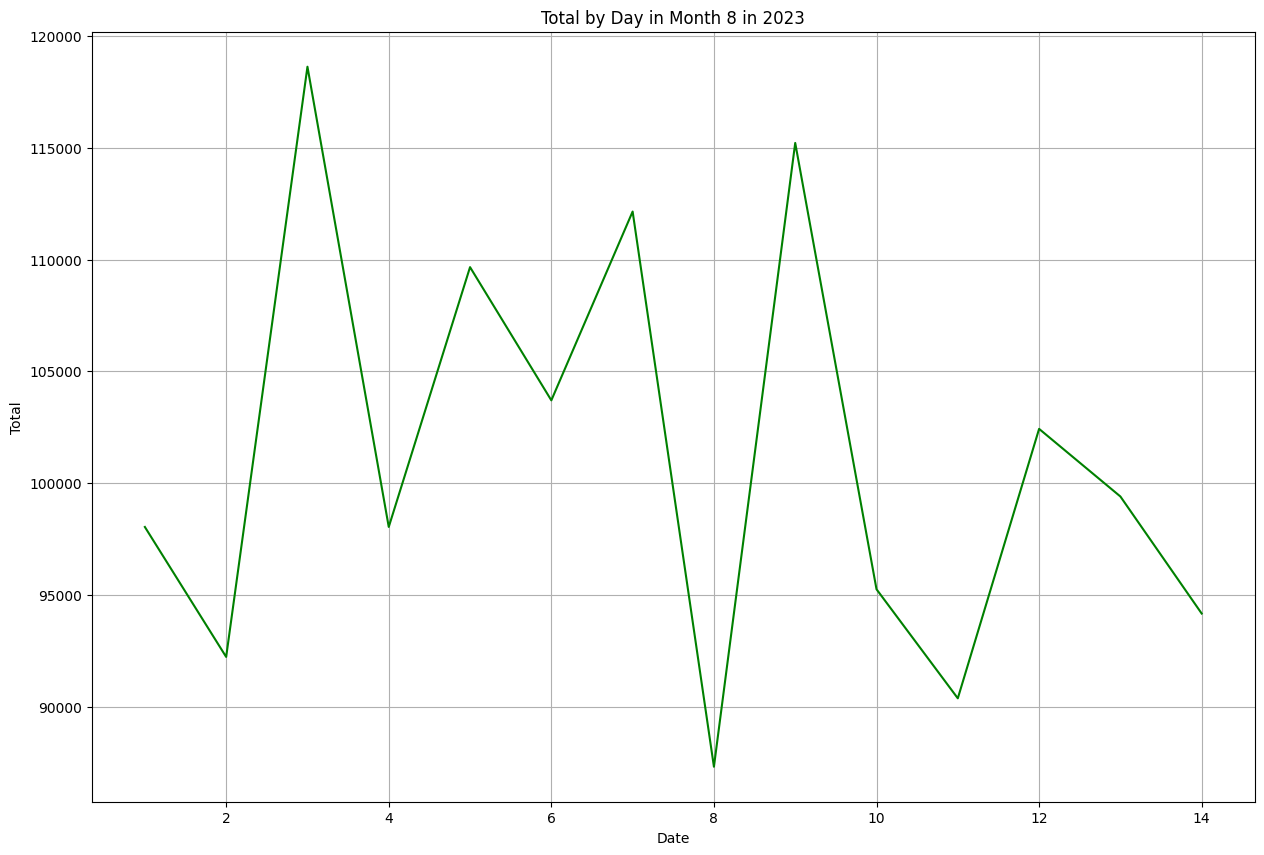

In [47]:
# draw line chart for df_totalByDay_pd by Month from 1 to 12 and year 2021 to 2023
for i in range(1,13):
    plt.figure(figsize=(15, 10))
    sns.lineplot(x='Date', y='Total', data=df_totalByDay_pd[(df_totalByDay_pd['Month']==i) & (df_totalByDay_pd['Year']==2021)], color='green')
    plt.title('Total by Day in Month '+str(i)+' in 2021')
    plt.xlabel('Date')
    plt.ylabel('Total')
    plt.grid()
    plt.subplots_adjust(hspace=0.3)
    plt.savefig('Image/2021/Total_by_Day_in_Month_'+str(i)+'_in_2021.png')


for i in range(1,13):
    plt.figure(figsize=(15, 10))
    sns.lineplot(x='Date', y='Total', data=df_totalByDay_pd[(df_totalByDay_pd['Month']==i) & (df_totalByDay_pd['Year']==2022)], color='green')
    plt.title('Total by Day in Month '+str(i)+' in 2022')
    plt.xlabel('Date')
    plt.ylabel('Total')
    plt.grid()
    plt.subplots_adjust(hspace=0.3)
    plt.savefig('Image/2022/Total_by_Day_in_Month_'+str(i)+'_in_2022.png')


for i in range(1,9):
    plt.figure(figsize=(15, 10))
    sns.lineplot(x='Date', y='Total', data=df_totalByDay_pd[(df_totalByDay_pd['Month']==i) & (df_totalByDay_pd['Year']==2023)], color='green')
    plt.title('Total by Day in Month '+str(i)+' in 2023')
    plt.xlabel('Date')
    plt.ylabel('Total')
    plt.grid()
    plt.subplots_adjust(hspace=0.3)
    plt.savefig('Image/2023/Total_by_Day_in_Month_'+str(i)+'_in_2023.png')


In [48]:
# count ORDERID and rename to Fre by USERID in df_userorder_pd
df_userorder_pd = df_order_pd.groupby(['Userid']).agg({'Orderid': 'count'}).reset_index()
df_userorder_pd.rename(columns={'Orderid': 'Fre'}, inplace=True)
# Create a df Fre and count USERID in df_userorder_pd
df_userorder_pd = df_userorder_pd.groupby(['Fre']).agg({'Userid': 'count'}).reset_index()
df_userorder_pd.rename(columns={'Userid': 'Count'}, inplace=True)
df_userorder_pd

Fre  Count
0     1  30625
1     2  26656
2     3  15322
3     4   6601
4     5   2336
5     6    697
6     7    151
7     8     35
8     9      9
9    10      2
10   11      1

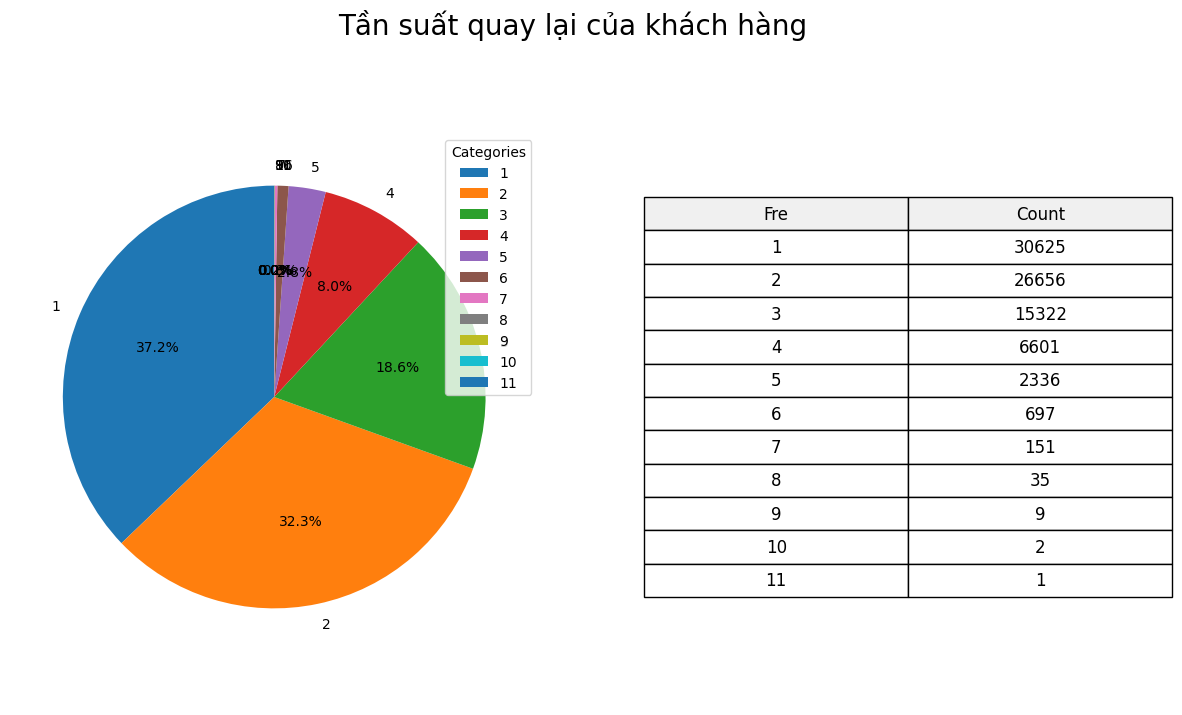

In [49]:
# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# Plot the pie chart with a legend
ax1.pie(df_userorder_pd['Count'], labels=df_userorder_pd['Fre'], autopct='%1.1f%%', startangle=90)
ax1.legend(df_userorder_pd['Fre'], title='Categories', loc='upper right')

# Remove x and y axis labels for the pie chart
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xticks([])
ax1.set_yticks([])

# Plot the data table
ax2.axis('off')
table = ax2.table(cellText=df_userorder_pd.values, colLabels=df_userorder_pd.columns, loc='center', cellLoc='center', colColours=['#f0f0f0']*len(df_userorder_pd.columns))
table.auto_set_font_size(True)
table.set_fontsize(12)
table.scale(1, 2)

# Add space between subplots
plt.subplots_adjust(wspace=0.2)

plt.suptitle('Tần suất quay lại của khách hàng', fontsize=20)
plt.savefig('Image/Stastic/pieplot_Frequency.png')
plt.show()

In [61]:

df_Item1 = df_item_pd.groupby(['Itemname','Brand','Category1','Category2','Category3','Category4','Price']).agg({'SoldQuantity': 'sum'}).reset_index()

df_Item1['TotalAmount'] = df_item_pd.groupby(['Itemname','Brand','Category1','Category2','Category3','Category4','Price']).agg({'TotalAmount': 'sum'}).reset_index()['TotalAmount']
print(df_Item1.info())
df_Item1 = df_Item1[df_Item1['Brand'] != 'KIRTASIYELER']
df_Item1.to_csv('Data/df_Item1.csv', index=False)
df_Item1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10472 entries, 0 to 10471
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Itemname      10472 non-null  object
 1   Brand         10472 non-null  object
 2   Category1     10472 non-null  object
 3   Category2     10472 non-null  object
 4   Category3     10472 non-null  object
 5   Category4     10472 non-null  object
 6   Price         10472 non-null  object
 7   SoldQuantity  10472 non-null  int64 
 8   TotalAmount   10472 non-null  object
dtypes: int64(1), object(8)
memory usage: 736.4+ KB
None


Itemname     Brand Category1  \
0      "BINGO DINAMIC B.MAK.TAB.8 IN 1 30 LU *5*     BINGO  DETERJAN   
1                      "CANTA BOY KURAN I  KERIM  KITAPLAR        EV   
2           ..ACE GENTILE SIHIRLI RENK.1 KG *10*       ACE  DETERJAN   
13             1.SINIF OKUMA KITAPLARI-10 KITAP   KITAPLAR        EV   
17                     100 % KENDINIZ OLUN / CEP  KITAPLAR        EV   
...                                          ...       ...       ...   
10463     ZIPZIP VE BEBEK KELEBEK-KELEBEK ÇAYIRI  KITAPLAR        EV   
10464                               ZIRVEDEKILER  KITAPLAR        EV   
10467                 ÇANAKKALE 1915 / YEDIVEREN  KITAPLAR        EV   
10468         ÇIRAK ARANIYOR-İSTANBUL RÜYA MUHAF  KITAPLAR        EV   
10469                       ÇOCUK SEVGİSİ UĞRUNA  KITAPLAR        EV   

                   Category2                  Category3 Category4  Price  \
0             BULASIK YIKAMA  BULASIK MAKINASI URUNLERI    TABLET  33.59   
1      KITAP-DERGI-KIRTASIYE                      KITAP  KITAPLAR  50.73   
2             CAMASIR YIKAMA            TOZ DETERJANLAR    NORMAL   4.84   
13     KITAP-DERGI-KIRTASIYE                      KITAP  KITAPLAR  10.53   
17     KITAP-DERGI-KIRTASIYE                      KITAP  KITAPLAR  18.94   
...                      ...                        ...       ...    ...   
10463  KITAP-DERGI-KIRTASIYE                      KITAP  KITAPLAR  26.03   
10464  KITAP-DERGI-KIRTASIYE                      KITAP  KITAPLAR  68.28   
10467  KITAP-DERGI-KIRTASIYE                      KITAP  KITAPLAR   8.61   
10468  KITAP-DERGI-KIRTASIYE                      KITAP  KITAPLAR  12.27   
10469  KITAP-DERGI-KIRTASIYE                      KITAP  KITAPLAR   6.36   

       SoldQuantity TotalAmount  
0                 4      134.36  
1               120     4653.76  
2                 6       29.04  
13              197     1665.16  
17              167     2536.03  
...             ...         ...  
10463           234     5313.17  
10464           210     3995.83  
10467           229     7608.71  
10468           177     2207.74  
10469           138     3901.16  

[7448 rows x 9 columns]

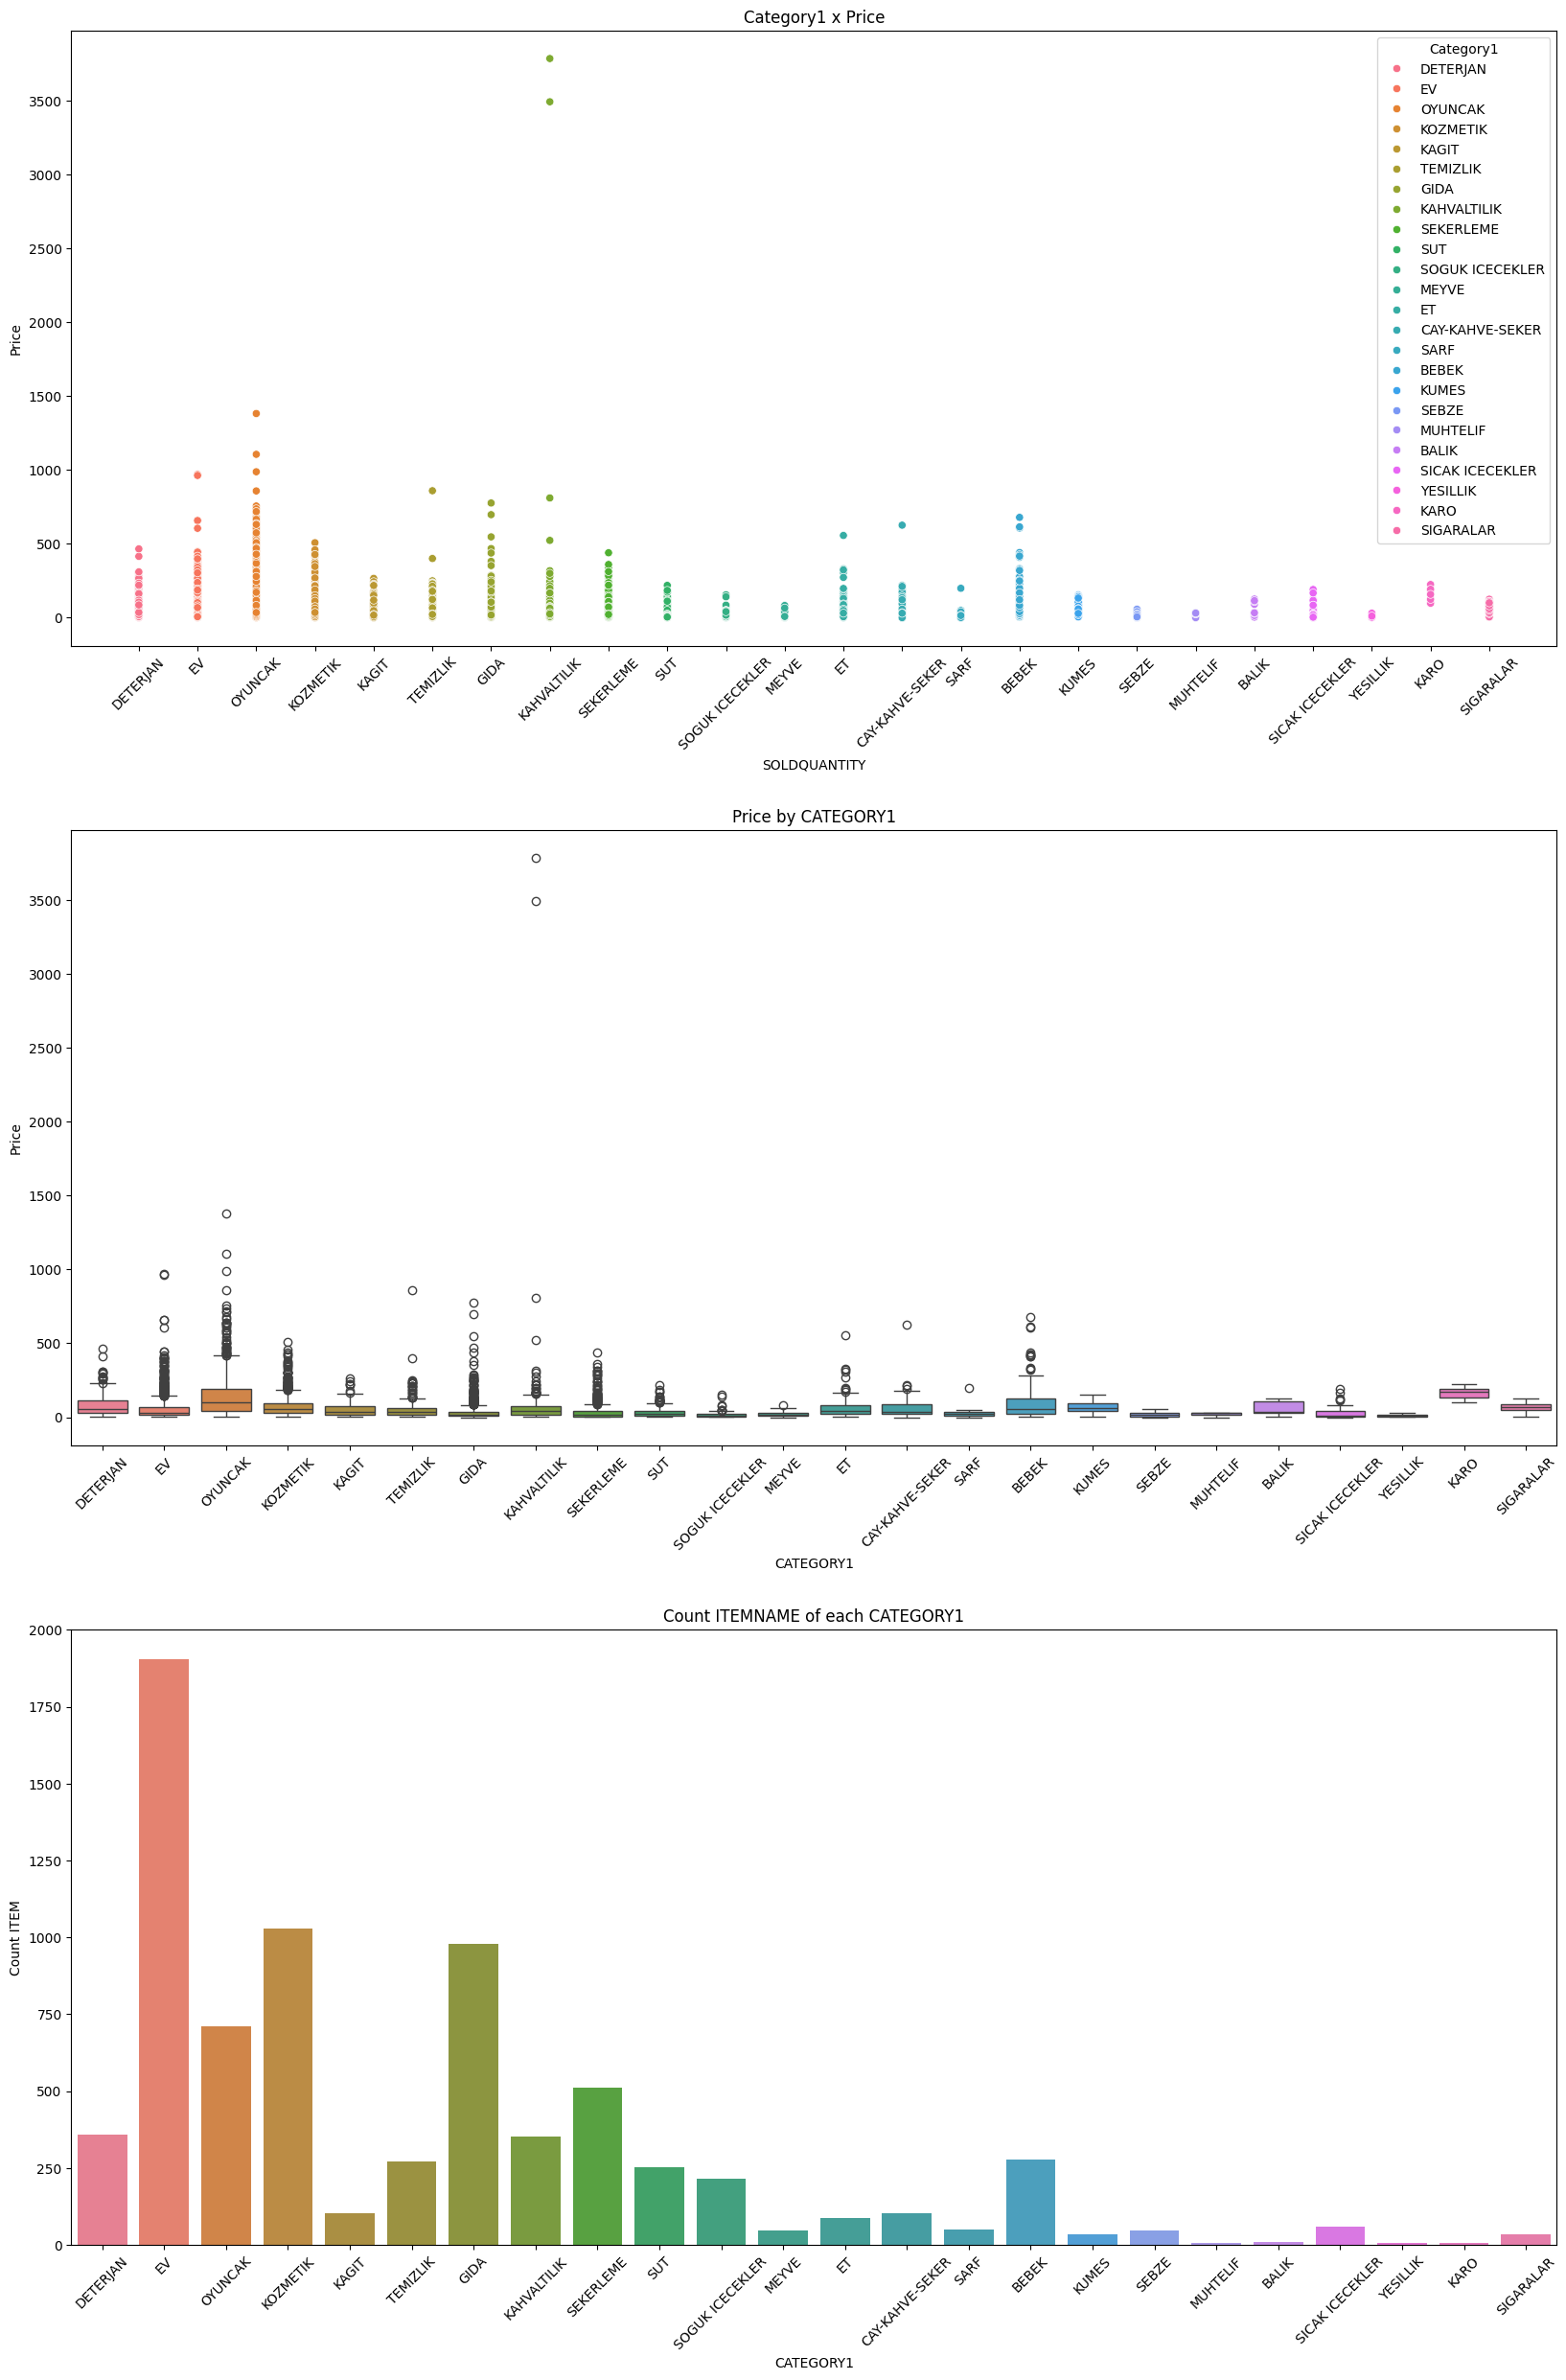

In [62]:
plt.figure(figsize=(20, 30))

plt.subplot(3, 1, 1)
sns.scatterplot(x='Category1', y='Price', data=df_Item1, hue='Category1')
plt.title('Category1 x Price')
plt.xlabel('SOLDQUANTITY')
plt.ylabel('Price')
plt.xticks(rotation=45)
# 2 plot cách nhau 0.5
plt.subplots_adjust(hspace=0.3)

plt.subplot(3, 1, 2)
sns.boxplot(x='Category1', y='Price', data=df_Item1, hue='Category1')
plt.title('Price by CATEGORY1')
plt.xlabel('CATEGORY1')
plt.ylabel('Price')
plt.xticks(rotation=45)

plt.subplots_adjust(hspace=0.3)

# plot count ITEMNAME of each CATEGORY1
plt.subplot(3, 1, 3)
sns.countplot(x='Category1', data=df_Item1, hue='Category1')
plt.title('Count ITEMNAME of each CATEGORY1')
plt.xlabel('CATEGORY1')
plt.ylabel('Count ITEM')
plt.xticks(rotation=45)
plt.subplots_adjust(hspace=0.3)

# Hiển thị plot
#plt.tight_layout()  # Đảm bảo không có sự chồng chéo giữa các subplot
plt.savefig('Image/Stastic/scatterplot_CategoryStatistic.png')
plt.show()

In [52]:
df_Category1 = df_Item1.groupby(['Category1']).agg({'SoldQuantity': 'sum'}).reset_index()
df_Category1['TotalAmount'] = df_Item1.groupby(['Category1']).agg({'TotalAmount': 'sum'}).reset_index()['TotalAmount']
# save df_Category1 to csv file 
df_Category1.to_csv('data/df_Category1.csv',index=False)
df_Category1

Category1  SoldQuantity  TotalAmount
0             BALIK            56      3252.19
1             BEBEK          1478    129431.39
2   CAY-KAHVE-SEKER           574     32344.10
3          DETERJAN          1848    138813.35
4                ET           451     31054.15
5                EV        870474  24210618.42
6              GIDA          5296    183147.08
7             KAGIT           571     34486.85
8       KAHVALTILIK          1915    149752.19
9              KARO            44      6606.28
10         KOZMETIK          5764    400319.89
11            KUMES           208     13889.21
12            MEYVE           247      4392.79
13         MUHTELIF            40       795.26
14          OYUNCAK          4017    578768.98
15             SARF           289      6931.19
16            SEBZE           255      4651.51
17        SEKERLEME          2840    114998.95
18  SICAK ICECEKLER           297     10207.12
19        SIGARALAR           189     12558.68
20  SOGUK ICECEKLER          1183     18277.05
21              SUT          1448     54695.46
22         TEMIZLIK          1479     78113.70
23         YESILLIK            28       423.17

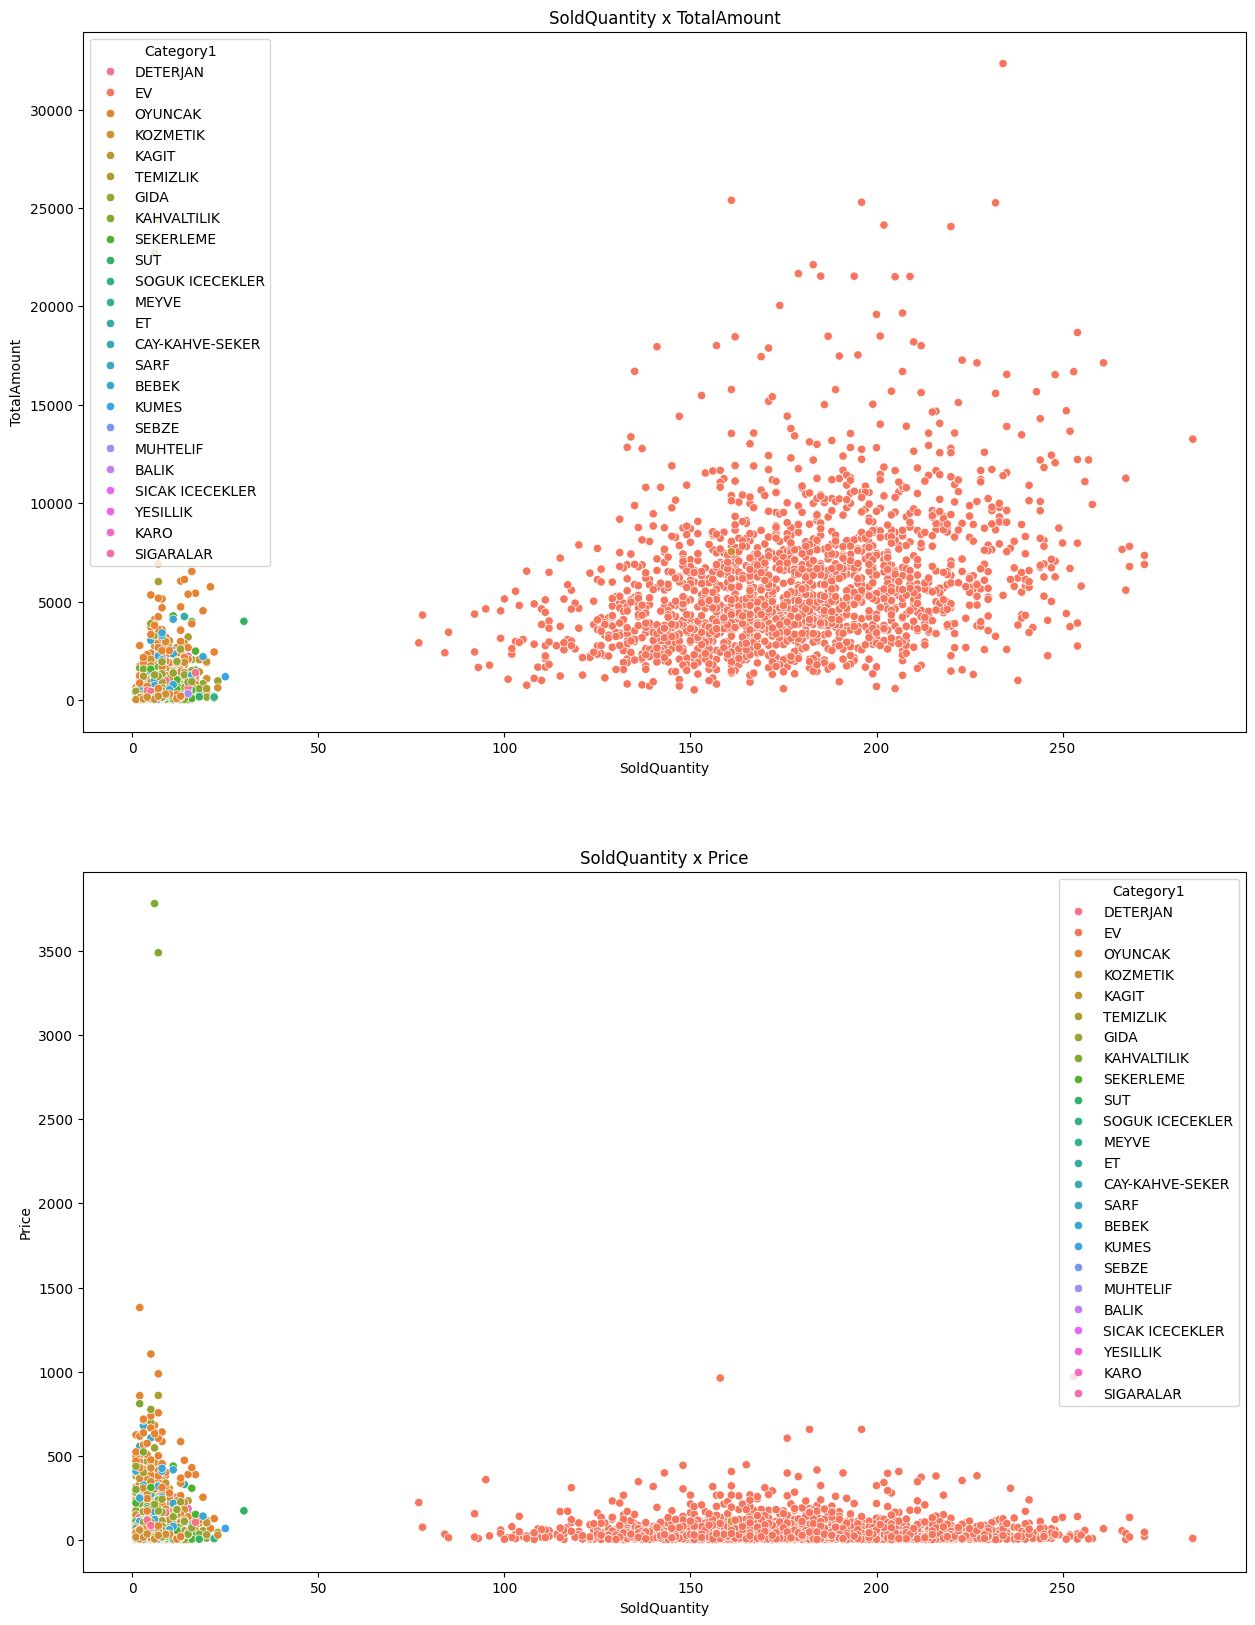

In [63]:
plt.figure(figsize=(15, 20))
plt.subplot(2, 1, 1)
sns.scatterplot(x='SoldQuantity', y='TotalAmount', data=df_Item1, hue='Category1')
plt.title('SoldQuantity x TotalAmount')
plt.xlabel('SoldQuantity')
plt.ylabel('TotalAmount')

plt.subplot(2, 1, 2)
sns.scatterplot(x='SoldQuantity', y='Price', data=df_Item1, hue='Category1')
plt.title('SoldQuantity x Price')
plt.xlabel('SoldQuantity')
plt.ylabel('Price')

# Hiển thị plot
#plt.tight_layout()  # Đảm bảo không có sự chồng chéo giữa các subplot
plt.savefig('Image/Stastic/scatterplot_SellScope.png')
plt.show()

In [54]:
# tính tổng tiền bán được theo CITY và sắp xếp giảm dần
df_totalByCity_pd = df_user_pd.groupby('City').agg({'TotalPay': 'sum'}).reset_index()
df_totalByCity_pd.sort_values(by='TotalPay', ascending=False, inplace=True)
df_totalByCity_pd.to_csv('data/df_totalByCity.csv',index=False)
df_totalByCity_pd

City     TotalPay
77   İstanbul  13288681.80
5      Ankara   5211258.53
78      İzmir   3855170.22
20      Bursa   2820989.56
6     Antalya   2257975.23
..        ...          ...
42      Kilis    143173.33
31  Gümüşhane    121313.71
7     Ardahan     96459.93
68    Tunceli     67062.42
14    Bayburt     63834.85

[81 rows x 2 columns]

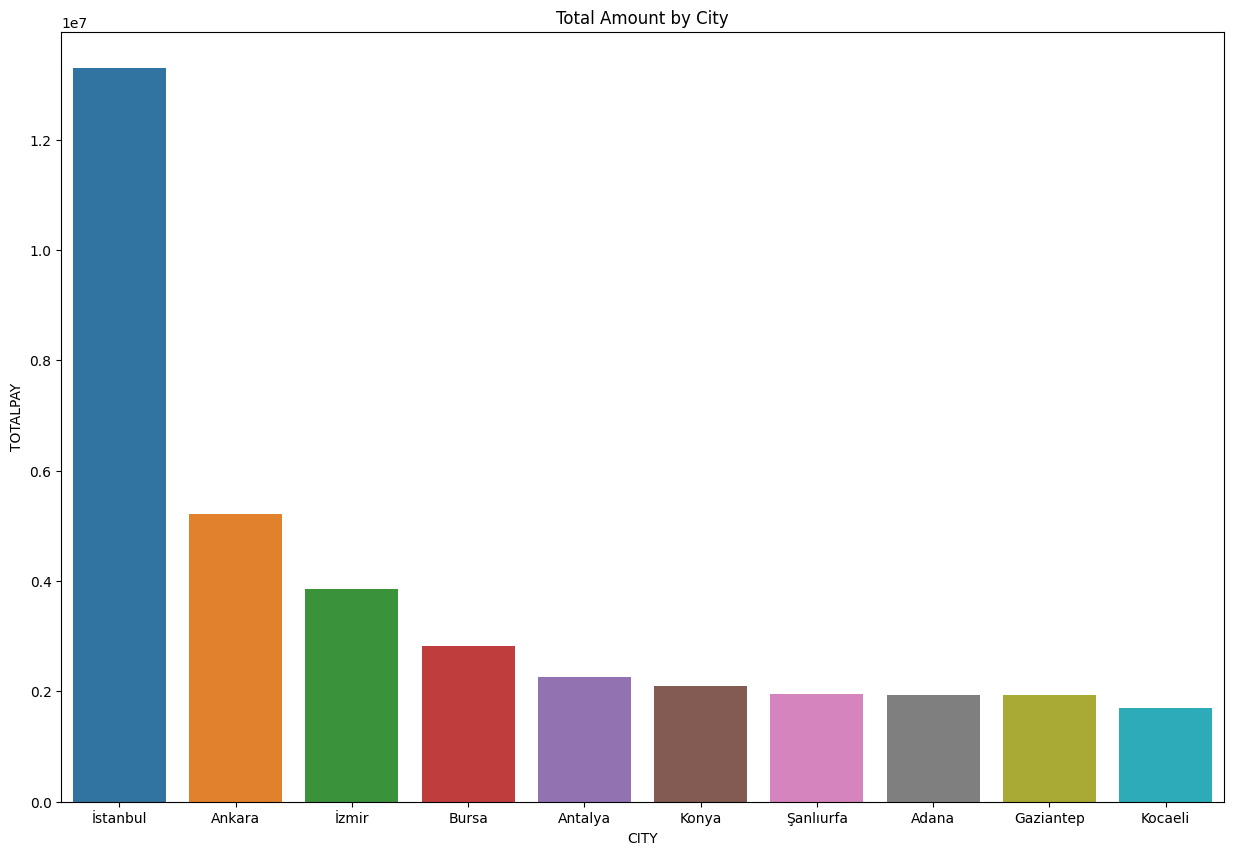

In [55]:
# show biểu đồ cột thể hiện tổng tiền bán được theo CITY
plt.figure(figsize=(15,10))

#plt.subplot(2, 1, 1)
sns.barplot(x=df_totalByCity_pd.head(10)['City'],y=df_totalByCity_pd.head(10)['TotalPay'],hue=df_totalByCity_pd.head(10)['City'])
plt.xlabel('CITY')
plt.ylabel('TOTALPAY')
plt.title('Total Amount by City')
plt.grid()



plt.grid()
plt.savefig('Image/Stastic/barplot_City.png')
plt.show()

In [56]:
#create df have BRAND and TOTALAMOUNT and SOLDQUANTITY from df_Item
df_Brand = df_Item1.groupby(['Brand','Category1']).agg({'TotalAmount': 'sum'}).reset_index()
df_Brand['SoldQuantity'] = df_Item1.groupby(['Brand','Category1']).agg({'SoldQuantity': 'sum'}).reset_index()['SoldQuantity']
# sort df_Brand by TOTALAMOUNT and BRAND
df_Brand.sort_values(by=['TotalAmount','SoldQuantity'], ascending=False, inplace=True)
#delete brand = 'KIRTASIYELER'
df_Brand.to_csv('data/df_Brand.csv',index=False)
df_Brand

Brand        Category1  TotalAmount  SoldQuantity
232   KIRTASIYELER               EV  13030124.68        532018
233       KITAPLAR               EV  10775748.91        330103
320        OYUNCAK          OYUNCAK    573397.76          4002
166          GEZER               EV    218030.68          3158
332     PASA BAHCE               EV     38543.21           727
..             ...              ...          ...           ...
271         MEVSIM  SOGUK ICECEKLER        13.32             6
381      SALATALIK            SEBZE        12.44             2
186           HALK  SOGUK ICECEKLER        11.04             6
198           ICIM             GIDA         9.96             3
347  PIERRE CARDIN            BEBEK         9.44             1

[499 rows x 4 columns]

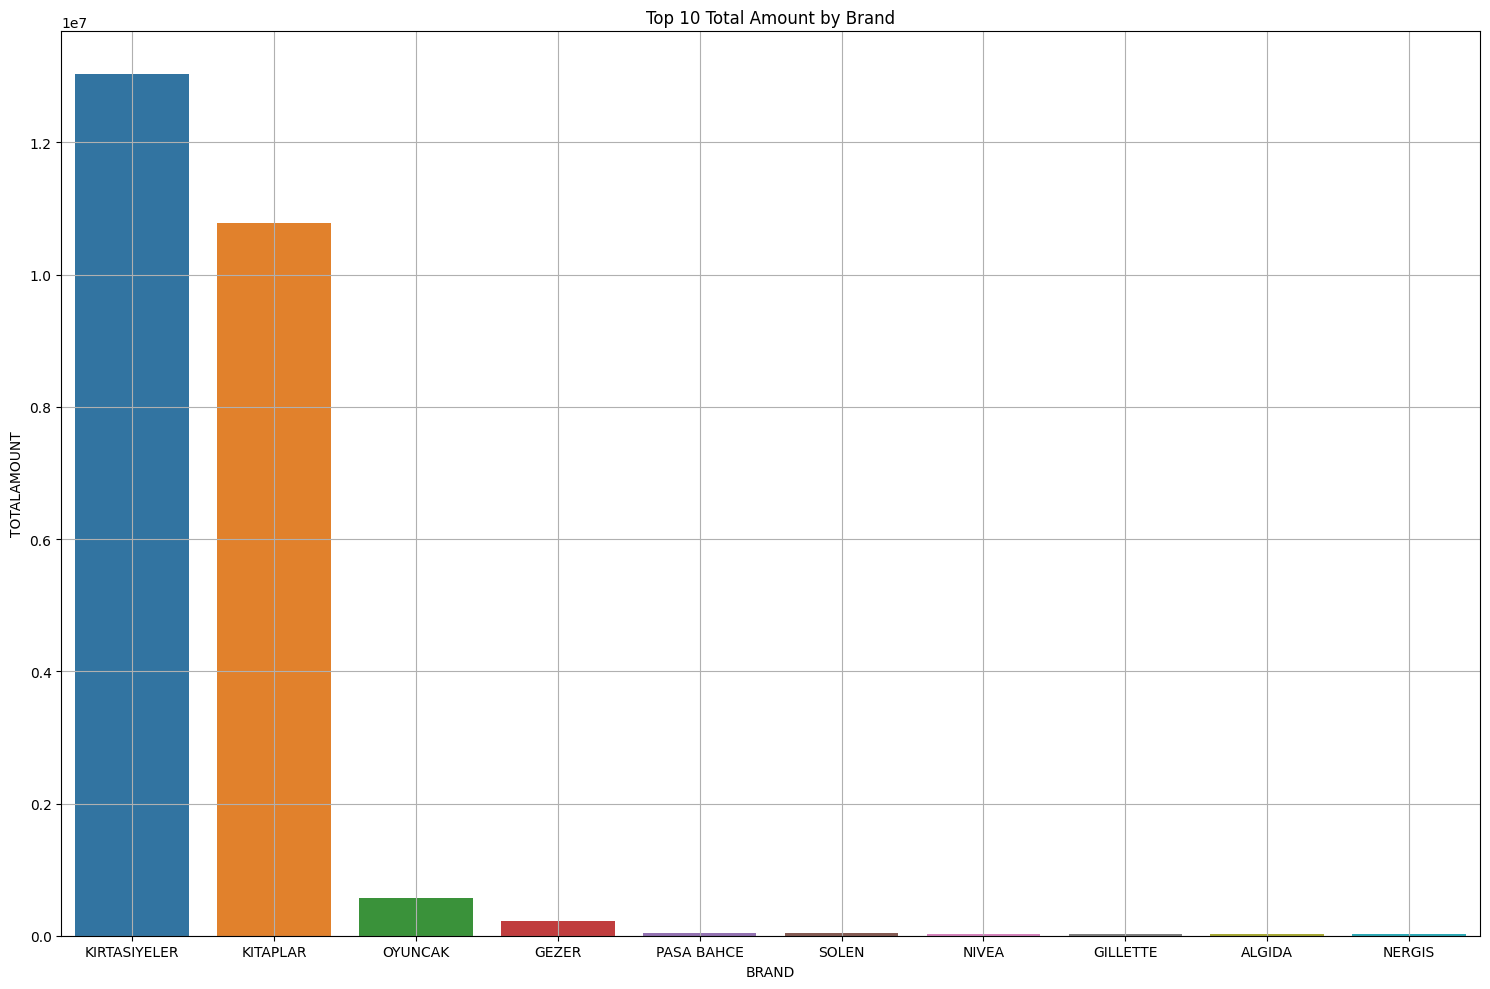

In [57]:
#show data table in plt
plt.figure(figsize=(15,10))
#plt.subplot(2, 1, 1)  # 2 dòng, 1 cột, biểu đồ thứ nhất
sns.barplot(x=df_Brand.head(10)['Brand'],y=df_Brand.head(10)['TotalAmount'], estimator=sum, hue = df_Brand.head(10)['Brand'])
plt.xlabel('BRAND')
plt.ylabel('TOTALAMOUNT')
plt.title('Top 10 Total Amount by Brand')
plt.grid()

# Hiển thị plot
plt.tight_layout()  # Đảm bảo không có sự chồng chéo giữa các subplot
plt.savefig('Image/Stastic/barplot_Brand.png')
plt.show()

In [64]:
# table TopItem have top 100 item have best SoldQuantity and TotalAmount
TopItem = df_Item1.sort_values(by=['SoldQuantity','TotalAmount'], ascending=False).head(1000)
TopItem.to_csv('data/TopItem.csv',index=False)
TopItem


Itemname     Brand Category1  \
4866   KITAP BAG.CAGIR. DOV.COCUK TERBIYESI   KITAPLAR        EV   
366                            AFFET VE UNUT  KITAPLAR        EV   
3757              HANIMLARA OZEL ILMIHAL NUH  KITAPLAR        EV   
4997  KITAP KAPTAN FELLINI-EFSANE KRAMPONLAR  KITAPLAR        EV   
3495                  GIZEMLI SAYILAR KITABI  KITAPLAR        EV   
...                                      ...       ...       ...   
2503                          EGITICI BOYAMA  KITAPLAR        EV   
8569            SIRIN FANTASIA  ERKEK CORAP      SIRIN        EV   
4936  KITAP EL YAZILI DUNYA KLASIKLERI GUVEN  KITAPLAR        EV   
8116        SAFTIRIK GREG-TURUNUN SON ORNEGI  KITAPLAR        EV   
6235                         MUKADDES KAVGAM  KITAPLAR        EV   

                   Category2 Category3    Category4   Price  SoldQuantity  \
4866   KITAP-DERGI-KIRTASIYE     KITAP     KITAPLAR    8.96           285   
366    KITAP-DERGI-KIRTASIYE     KITAP     KITAPLAR   20.27           272   
3757   KITAP-DERGI-KIRTASIYE     KITAP     KITAPLAR   45.38           272   
4997   KITAP-DERGI-KIRTASIYE     KITAP     KITAPLAR   17.59           268   
3495   KITAP-DERGI-KIRTASIYE     KITAP     KITAPLAR  134.05           268   
...                      ...       ...          ...     ...           ...   
2503   KITAP-DERGI-KIRTASIYE     KITAP     KITAPLAR   19.55           175   
8569  TEKSTIL-GIYIM-AKSESUAR  CORAPLAR  ERKEK CORAP   10.55           175   
4936   KITAP-DERGI-KIRTASIYE     KITAP     KITAPLAR   17.39           175   
8116   KITAP-DERGI-KIRTASIYE     KITAP     KITAPLAR  155.62           174   
6235   KITAP-DERGI-KIRTASIYE     KITAP     KITAPLAR   40.40           174   

     TotalAmount  
4866    13250.99  
366      7343.45  
3757     6882.28  
4997     7804.45  
3495     6777.74  
...          ...  
2503     2016.65  
8569     1427.20  
4936      566.05  
8116    20043.31  
6235     9447.09  

[1000 rows x 9 columns]